## Objective

Comparative study of KNN and Decision tree for predicting Students Adaptability level in Online Education.

### Import libraries

In [75]:

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from ydata_profiling import ProfileReport
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import OrdinalEncoder


# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split,GridSearchCV
# from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
# from sklearn.metrics import classification_report
# import plotly.express as px
# from scipy.stats import chi2_contingency
# from imblearn import under_sampling,over_sampling
# from sklearn.ensemble import VotingClassifier
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.neighbors import KNeighborsClassifier

### Read Data

In [2]:
data = pd.read_csv("Abdullah Zunorain - students_adaptability_level_online_education.csv")
data.head()


Gender    Age Education Level Institution Type IT Student Location  \
0    Boy  21-25      University   Non Government         No      Yes   
1   Girl  21-25      University   Non Government         No      Yes   
2   Girl  16-20         College       Government         No      Yes   
3   Girl  11-15          School   Non Government         No      Yes   
4   Girl  16-20          School   Non Government         No      Yes   

  Load-shedding Financial Condition Internet Type Network Type Class Duration  \
0           Low                 Mid          Wifi           4G            3-6   
1          High                 Mid   Mobile Data           4G            1-3   
2           Low                 Mid          Wifi           4G            1-3   
3           Low                 Mid   Mobile Data           4G            1-3   
4           Low                Poor   Mobile Data           3G              0   

  Self Lms  Device Adaptivity Level  
0       No     Tab         Moderate  
1      Yes  Mobile         Moderate  
2       No  Mobile         Moderate  
3       No  Mobile         Moderate  
4       No  Mobile              Low

In [3]:
data.shape

(1205, 14)

In [4]:
data["Age"]

0       21-25
1       21-25
2       16-20
3       11-15
4       16-20
        ...  
1200    16-20
1201    16-20
1202    11-15
1203    16-20
1204    11-15
Name: Age, Length: 1205, dtype: object

In [5]:
# data['ID'] = data.index

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [7]:
data.describe()

Gender    Age Education Level Institution Type IT Student Location  \
count    1205   1205            1205             1205       1205     1205   
unique      2      6               3                2          2        2   
top       Boy  21-25          School   Non Government         No      Yes   
freq      663    374             530              823        901      935   

       Load-shedding Financial Condition Internet Type Network Type  \
count           1205                1205          1205         1205   
unique             2                   3             2            3   
top              Low                 Mid   Mobile Data           4G   
freq            1004                 878           695          775   

       Class Duration Self Lms  Device Adaptivity Level  
count            1205     1205    1205             1205  
unique              3        2       3                3  
top               1-3       No  Mobile         Moderate  
freq              840      995    1013              625

### Generate Data Profiling Report

   - data profiling report on old version of dataset...

In [8]:
Report = ProfileReport(data)

In [9]:
Report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

  - data profiling report on the updated dataset(df_final)

In [122]:
Report = ProfileReport(df_final)
Report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**"Nominal"** typically refers to something being named or designated as such, without any inherent value or ranking implied. In statistics, nominal data refers to categorical data where the categories are purely labeled and don't have any inherent order or numerical significance. For example, colors of cars (red, blue, green) or types of fruit (apple, banana, orange) are nominal data because the categories are named but don't have any inherent order or ranking.

# Encoding

Choose a suitable encoding technique for the columns.

Encoding Techniques

 Each encoding technique and when to use them using simple language:

1. *One-Hot Encoding*:
   - Imagine you have a column called "Color" with categories like "Red," "Blue," and "Green." If you use one-hot encoding, each category will become its own column.
   - Use one-hot encoding when you have categories that don't have any order or ranking, like colors, countries, or types of fruits.

2. *Label Encoding*:
   - Picture a column called "Size" with categories like "Small," "Medium," and "Large." If you use label encoding, each category gets a number, like 0 for "Small," 1 for "Medium," and 2 for "Large."
   - Use label encoding when your categories have a clear order or ranking, like sizes, ratings (1 star, 2 stars, 3 stars), or education levels (high school, college, university).

3. *Binary Encoding*:
   - Think of binary encoding as a mix of one-hot encoding and label encoding. It turns each category into binary digits. For example, if you have categories like "Red," "Blue," and "Green," they might become 001, 010, and 100.
   - Use binary encoding when you have a lot of categories, and you want to save memory compared to one-hot encoding.

4. *Ordinal Encoding*:
   - Suppose you have a column called "Rating" with categories like "Low," "Medium," and "High." Ordinal encoding assigns each category a number based on its order. For example, "Low" might be 0, "Medium" might be 1, and "High" might be 2.
   - Use ordinal encoding when your categories have a clear order, but you want to use fewer numbers compared to label encoding.

5. *Frequency Encoding*:
   - Let's say you have a column called "City," and some cities appear more frequently than others. Frequency encoding replaces each category with the number of times it appears in the dataset.
   - Use frequency encoding when the frequency of categories is essential information for your model.

6. *Target Encoding* (or Mean Encoding):
   - Imagine you have a column called "City" and another column called "Revenue." Target encoding replaces each city with the average revenue for that city. So instead of "New York," you might have the average revenue for New York.
   - Use target encoding when you want to encode categorical variables based on their relationship with the target variable (like predicting revenue based on cities).

7. *Hashing Encoding*:
   - Think of hashing encoding as a way to reduce the number of categories. It turns categories into hash values, which are shorter and more manageable.
   - Use hashing encoding when you have many categories, and you want to save memory compared to other encoding techniques.

In [11]:
data.head(3)

Gender    Age Education Level Institution Type IT Student Location  \
0    Boy  21-25      University   Non Government         No      Yes   
1   Girl  21-25      University   Non Government         No      Yes   
2   Girl  16-20         College       Government         No      Yes   

  Load-shedding Financial Condition Internet Type Network Type Class Duration  \
0           Low                 Mid          Wifi           4G            3-6   
1          High                 Mid   Mobile Data           4G            1-3   
2           Low                 Mid          Wifi           4G            1-3   

  Self Lms  Device Adaptivity Level  
0       No     Tab         Moderate  
1      Yes  Mobile         Moderate  
2       No  Mobile         Moderate

In [12]:
# data["Institution Type"].value_counts()

In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [14]:

# Assuming the dataset is stored in a DataFrame called 'data'

# One-hot encoding for nominal categorical columns without inherent order
nominal_cols = ['Location','IT Student','Gender', 'Institution Type', 'Load-shedding', 'Internet Type', 'Network Type', 'Device', 'Self Lms']
df_encoded = pd.get_dummies(data, columns=nominal_cols, dtype=int)
df_encoded

Age Education Level Financial Condition Class Duration  \
0     21-25      University                 Mid            3-6   
1     21-25      University                 Mid            1-3   
2     16-20         College                 Mid            1-3   
3     11-15          School                 Mid            1-3   
4     16-20          School                Poor              0   
...     ...             ...                 ...            ...   
1200  16-20         College                 Mid            1-3   
1201  16-20         College                 Mid            3-6   
1202  11-15          School                 Mid            1-3   
1203  16-20         College                 Mid            1-3   
1204  11-15          School                Poor            1-3   

     Adaptivity Level  Location_No  Location_Yes  IT Student_No  \
0            Moderate            0             1              1   
1            Moderate            0             1              1   
2            Moderate            0             1              1   
3            Moderate            0             1              1   
4                 Low            0             1              1   
...               ...          ...           ...            ...   
1200              Low            0             1              1   
1201         Moderate            1             0              1   
1202         Moderate            0             1              1   
1203              Low            1             0              1   
1204         Moderate            0             1              1   

      IT Student_Yes  Gender_Boy  ...  Internet Type_Mobile Data  \
0                  0           1  ...                          0   
1                  0           0  ...                          1   
2                  0           0  ...                          0   
3                  0           0  ...                          1   
4                  0           0  ...                          1   
...              ...         ...  ...                        ...   
1200               0           0  ...                          0   
1201               0           0  ...                          0   
1202               0           1  ...                          1   
1203               0           0  ...                          0   
1204               0           0  ...                          1   

      Internet Type_Wifi  Network Type_2G  Network Type_3G  Network Type_4G  \
0                      1                0                0                1   
1                      0                0                0                1   
2                      1                0                0                1   
3                      0                0                0                1   
4                      0                0                1                0   
...                  ...              ...              ...              ...   
1200                   1                0                0                1   
1201                   1                0                0                1   
1202                   0                0                1                0   
1203                   1                0                0                1   
1204                   0                0                1                0   

      Device_Computer  Device_Mobile  Device_Tab  Self Lms_No  Self Lms_Yes  
0                   0              0           1            1             0  
1                   0              1           0            0             1  
2                   0              1           0            1             0  
3                   0              1           0            1             0  
4                   0              1           0            1             0  
...               ...            ...         ...          ...           ...  
1200                0              1           0            1             0  
1201                

In [15]:
df_encoded.dtypes

Age                                object
Education Level                    object
Financial Condition                object
Class Duration                     object
Adaptivity Level                   object
Location_No                         int32
Location_Yes                        int32
IT Student_No                       int32
IT Student_Yes                      int32
Gender_Boy                          int32
Gender_Girl                         int32
Institution Type_Government         int32
Institution Type_Non Government     int32
Load-shedding_High                  int32
Load-shedding_Low                   int32
Internet Type_Mobile Data           int32
Internet Type_Wifi                  int32
Network Type_2G                     int32
Network Type_3G                     int32
Network Type_4G                     int32
Device_Computer                     int32
Device_Mobile                       int32
Device_Tab                          int32
Self Lms_No                       

In [16]:
# df_encoded.head(3)

In [18]:
# data['Education Level'].value_counts()

In [19]:
# Label encoding for ordinal categorical columns with a clear order

label_encoder = LabelEncoder()
ordinal_cols = {
    'Age': ['1-5', '6-10', '11-15', '16-20', '21-25', '26-30'], 
    'Financial Condition': ['Poor', 'Mid', 'Rich'], 
    'Class Duration': ['0', '1-3', '3-6'],
    'Education Level': ['School', 'College', 'University']
}
    

In [20]:
# for col, categories in ordinal_cols.items():
#     print(col, "***", categories)

In [21]:
for col, categories in ordinal_cols.items():
    df_encoded[col] = label_encoder.fit_transform(data[col])

In [23]:
df_encoded.head(3)

Age  Education Level  Financial Condition  Class Duration Adaptivity Level  \
0    3                2                    0               2         Moderate   
1    3                2                    0               1         Moderate   
2    2                0                    0               1         Moderate   

   Location_No  Location_Yes  IT Student_No  IT Student_Yes  Gender_Boy  ...  \
0            0             1              1               0           1  ...   
1            0             1              1               0           0  ...   
2            0             1              1               0           0  ...   

   Internet Type_Mobile Data  Internet Type_Wifi  Network Type_2G  \
0                          0                   1                0   
1                          1                   0                0   
2                          0                   1                0   

   Network Type_3G  Network Type_4G  Device_Computer  Device_Mobile  \
0                0                1                0              0   
1                0                1                0              1   
2                0                1                0              1   

   Device_Tab  Self Lms_No  Self Lms_Yes  
0           1            1             0  
1           0            0             1  
2           0            1             0  

[3 rows x 25 columns]

In [1]:
df_encoded["Age"].value_counts()

NameError: name 'df_encoded' is not defined

In [28]:
df_encoded["Age"].nunique()

6

In [30]:
df_encoded['Financial Condition'].nunique()

3

In [24]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Age                              1205 non-null   int32 
 1   Education Level                  1205 non-null   int32 
 2   Financial Condition              1205 non-null   int32 
 3   Class Duration                   1205 non-null   int32 
 4   Adaptivity Level                 1205 non-null   object
 5   Location_No                      1205 non-null   int32 
 6   Location_Yes                     1205 non-null   int32 
 7   IT Student_No                    1205 non-null   int32 
 8   IT Student_Yes                   1205 non-null   int32 
 9   Gender_Boy                       1205 non-null   int32 
 10  Gender_Girl                      1205 non-null   int32 
 11  Institution Type_Government      1205 non-null   int32 
 12  Institution Type_Non Government  1

    - Encoding the target variable using label encoding

In [31]:
target_encoder = LabelEncoder()
df_encoded['Adaptivity Level'] = target_encoder.fit_transform(data['Adaptivity Level'])

In [32]:
# Display the encoded DataFrame
df_encoded.head()

Age  Education Level  Financial Condition  Class Duration  \
0    3                2                    0               2   
1    3                2                    0               1   
2    2                0                    0               1   
3    1                1                    0               1   
4    2                1                    1               0   

   Adaptivity Level  Location_No  Location_Yes  IT Student_No  IT Student_Yes  \
0                 2            0             1              1               0   
1                 2            0             1              1               0   
2                 2            0             1              1               0   
3                 2            0             1              1               0   
4                 1            0             1              1               0   

   Gender_Boy  ...  Internet Type_Mobile Data  Internet Type_Wifi  \
0           1  ...                          0                   1   
1           0  ...                          1                   0   
2           0  ...                          0                   1   
3           0  ...                          1                   0   
4           0  ...                          1                   0   

   Network Type_2G  Network Type_3G  Network Type_4G  Device_Computer  \
0                0                0                1                0   
1                0                0                1                0   
2                0                0                1                0   
3                0                0                1                0   
4                0                1                0                0   

   Device_Mobile  Device_Tab  Self Lms_No  Self Lms_Yes  
0              0           1            1             0  
1              1           0            0             1  
2              1           0            1             0  
3              1           0            1             0  
4              1           0            1             0  

[5 rows x 25 columns]

In [33]:
# all col's have `int` datatypes..
df_encoded.dtypes

Age                                int32
Education Level                    int32
Financial Condition                int32
Class Duration                     int32
Adaptivity Level                   int32
Location_No                        int32
Location_Yes                       int32
IT Student_No                      int32
IT Student_Yes                     int32
Gender_Boy                         int32
Gender_Girl                        int32
Institution Type_Government        int32
Institution Type_Non Government    int32
Load-shedding_High                 int32
Load-shedding_Low                  int32
Internet Type_Mobile Data          int32
Internet Type_Wifi                 int32
Network Type_2G                    int32
Network Type_3G                    int32
Network Type_4G                    int32
Device_Computer                    int32
Device_Mobile                      int32
Device_Tab                         int32
Self Lms_No                        int32
Self Lms_Yes    

In [35]:
len(df_encoded.columns)

25

In [36]:
df_encoded.columns

Index(['Age', 'Education Level', 'Financial Condition', 'Class Duration',
       'Adaptivity Level', 'Location_No', 'Location_Yes', 'IT Student_No',
       'IT Student_Yes', 'Gender_Boy', 'Gender_Girl',
       'Institution Type_Government', 'Institution Type_Non Government',
       'Load-shedding_High', 'Load-shedding_Low', 'Internet Type_Mobile Data',
       'Internet Type_Wifi', 'Network Type_2G', 'Network Type_3G',
       'Network Type_4G', 'Device_Computer', 'Device_Mobile', 'Device_Tab',
       'Self Lms_No', 'Self Lms_Yes'],
      dtype='object')

    - Drop the categorical cols (if required)

In [38]:
# # Since we have encoded marital status and education also created a useful feature from Dt Customer, we can drop these
# df_final = df_encoded.drop(columns=['Device_Computer', 'Device_Mobile','Device_Tab', 'Education Level', 'Gender_Girl','Gender_Boy', 'Self Lms_No', 'Self Lms_Yes', 'IT Student_No', 'IT Student_Yes', 'Internet Type_Mobile Data', 'Internet Type_Wifi', 'Load-shedding_Low', 'Load-shedding_High', 'Network Type_2G', 'Network Type_3G','Network Type_4G'])

In [42]:
len(df_encoded.columns)

25

In [43]:
len(df_final.columns)

8

### Check distribution

    Histograms are useful for visualizing the distribution of individual numerical columns.

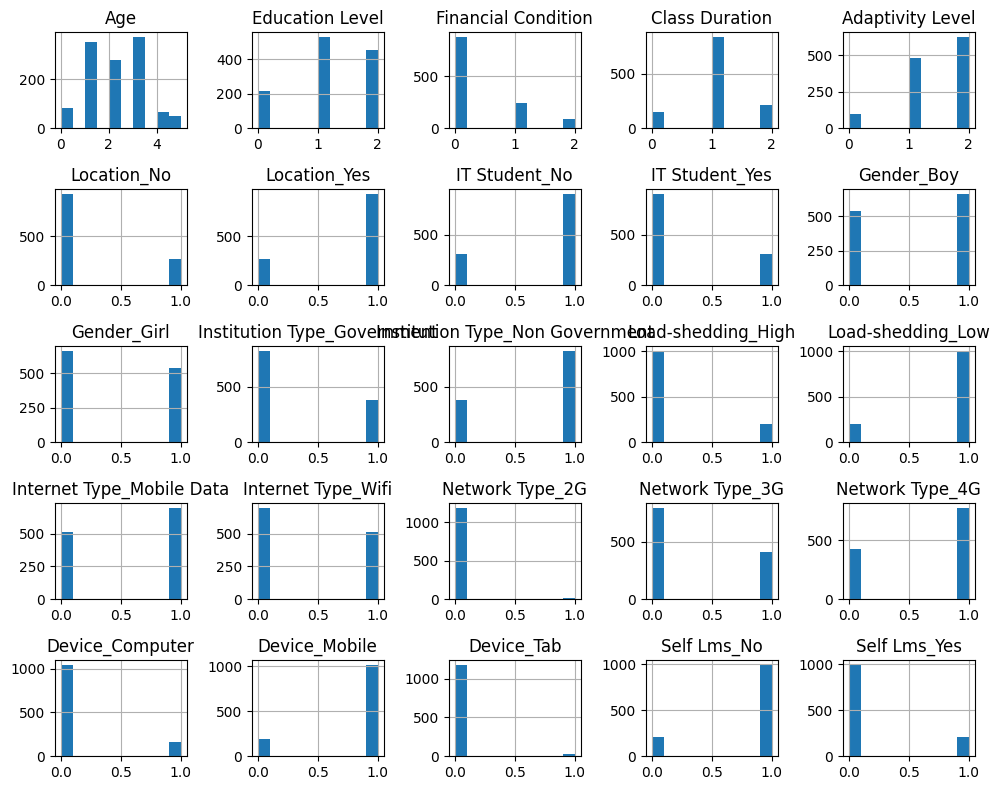

In [52]:
# Plot histograms for each numerical column
%matplotlib inline
df_encoded.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()


    Box plots help identify the central tendency and spread of numerical data, as well as detect outliers.

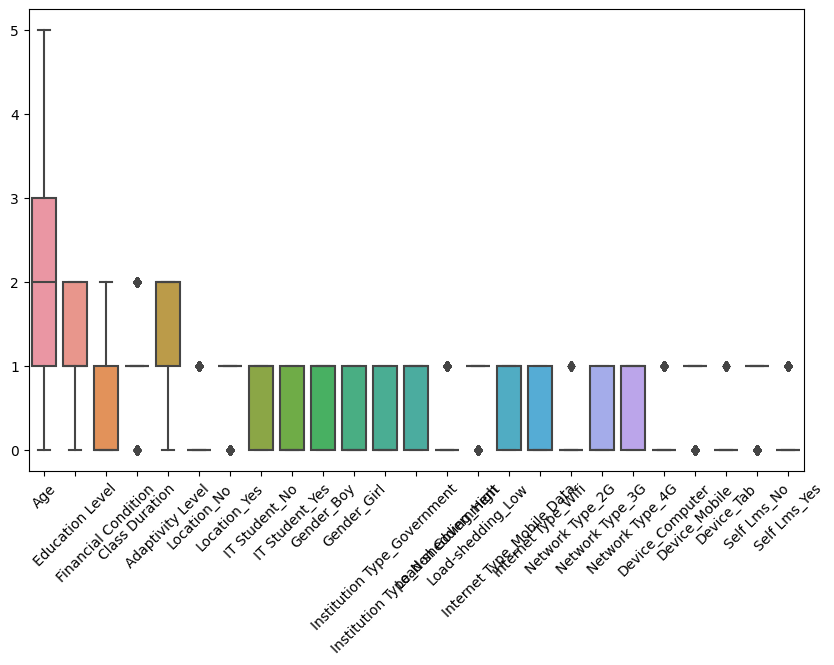

In [53]:
# Plot box plots for each numerical column
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_encoded)
plt.xticks(rotation=45)
plt.show()


    Violin plots combine aspects of KDE plots and box plots to provide a richer visualization of the data distribution.

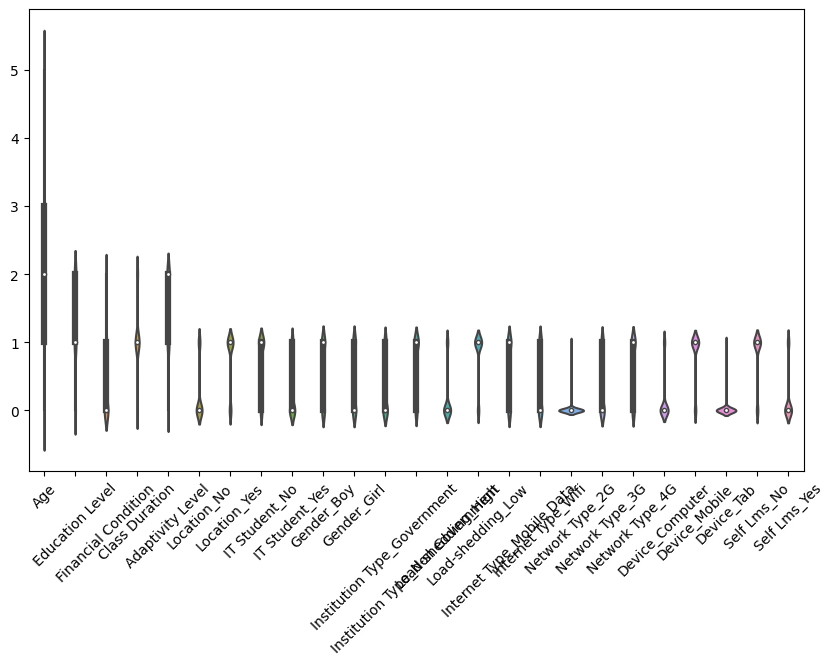

In [54]:
# Plot violin plots for each numerical column
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_encoded)
plt.xticks(rotation=45)
plt.show()

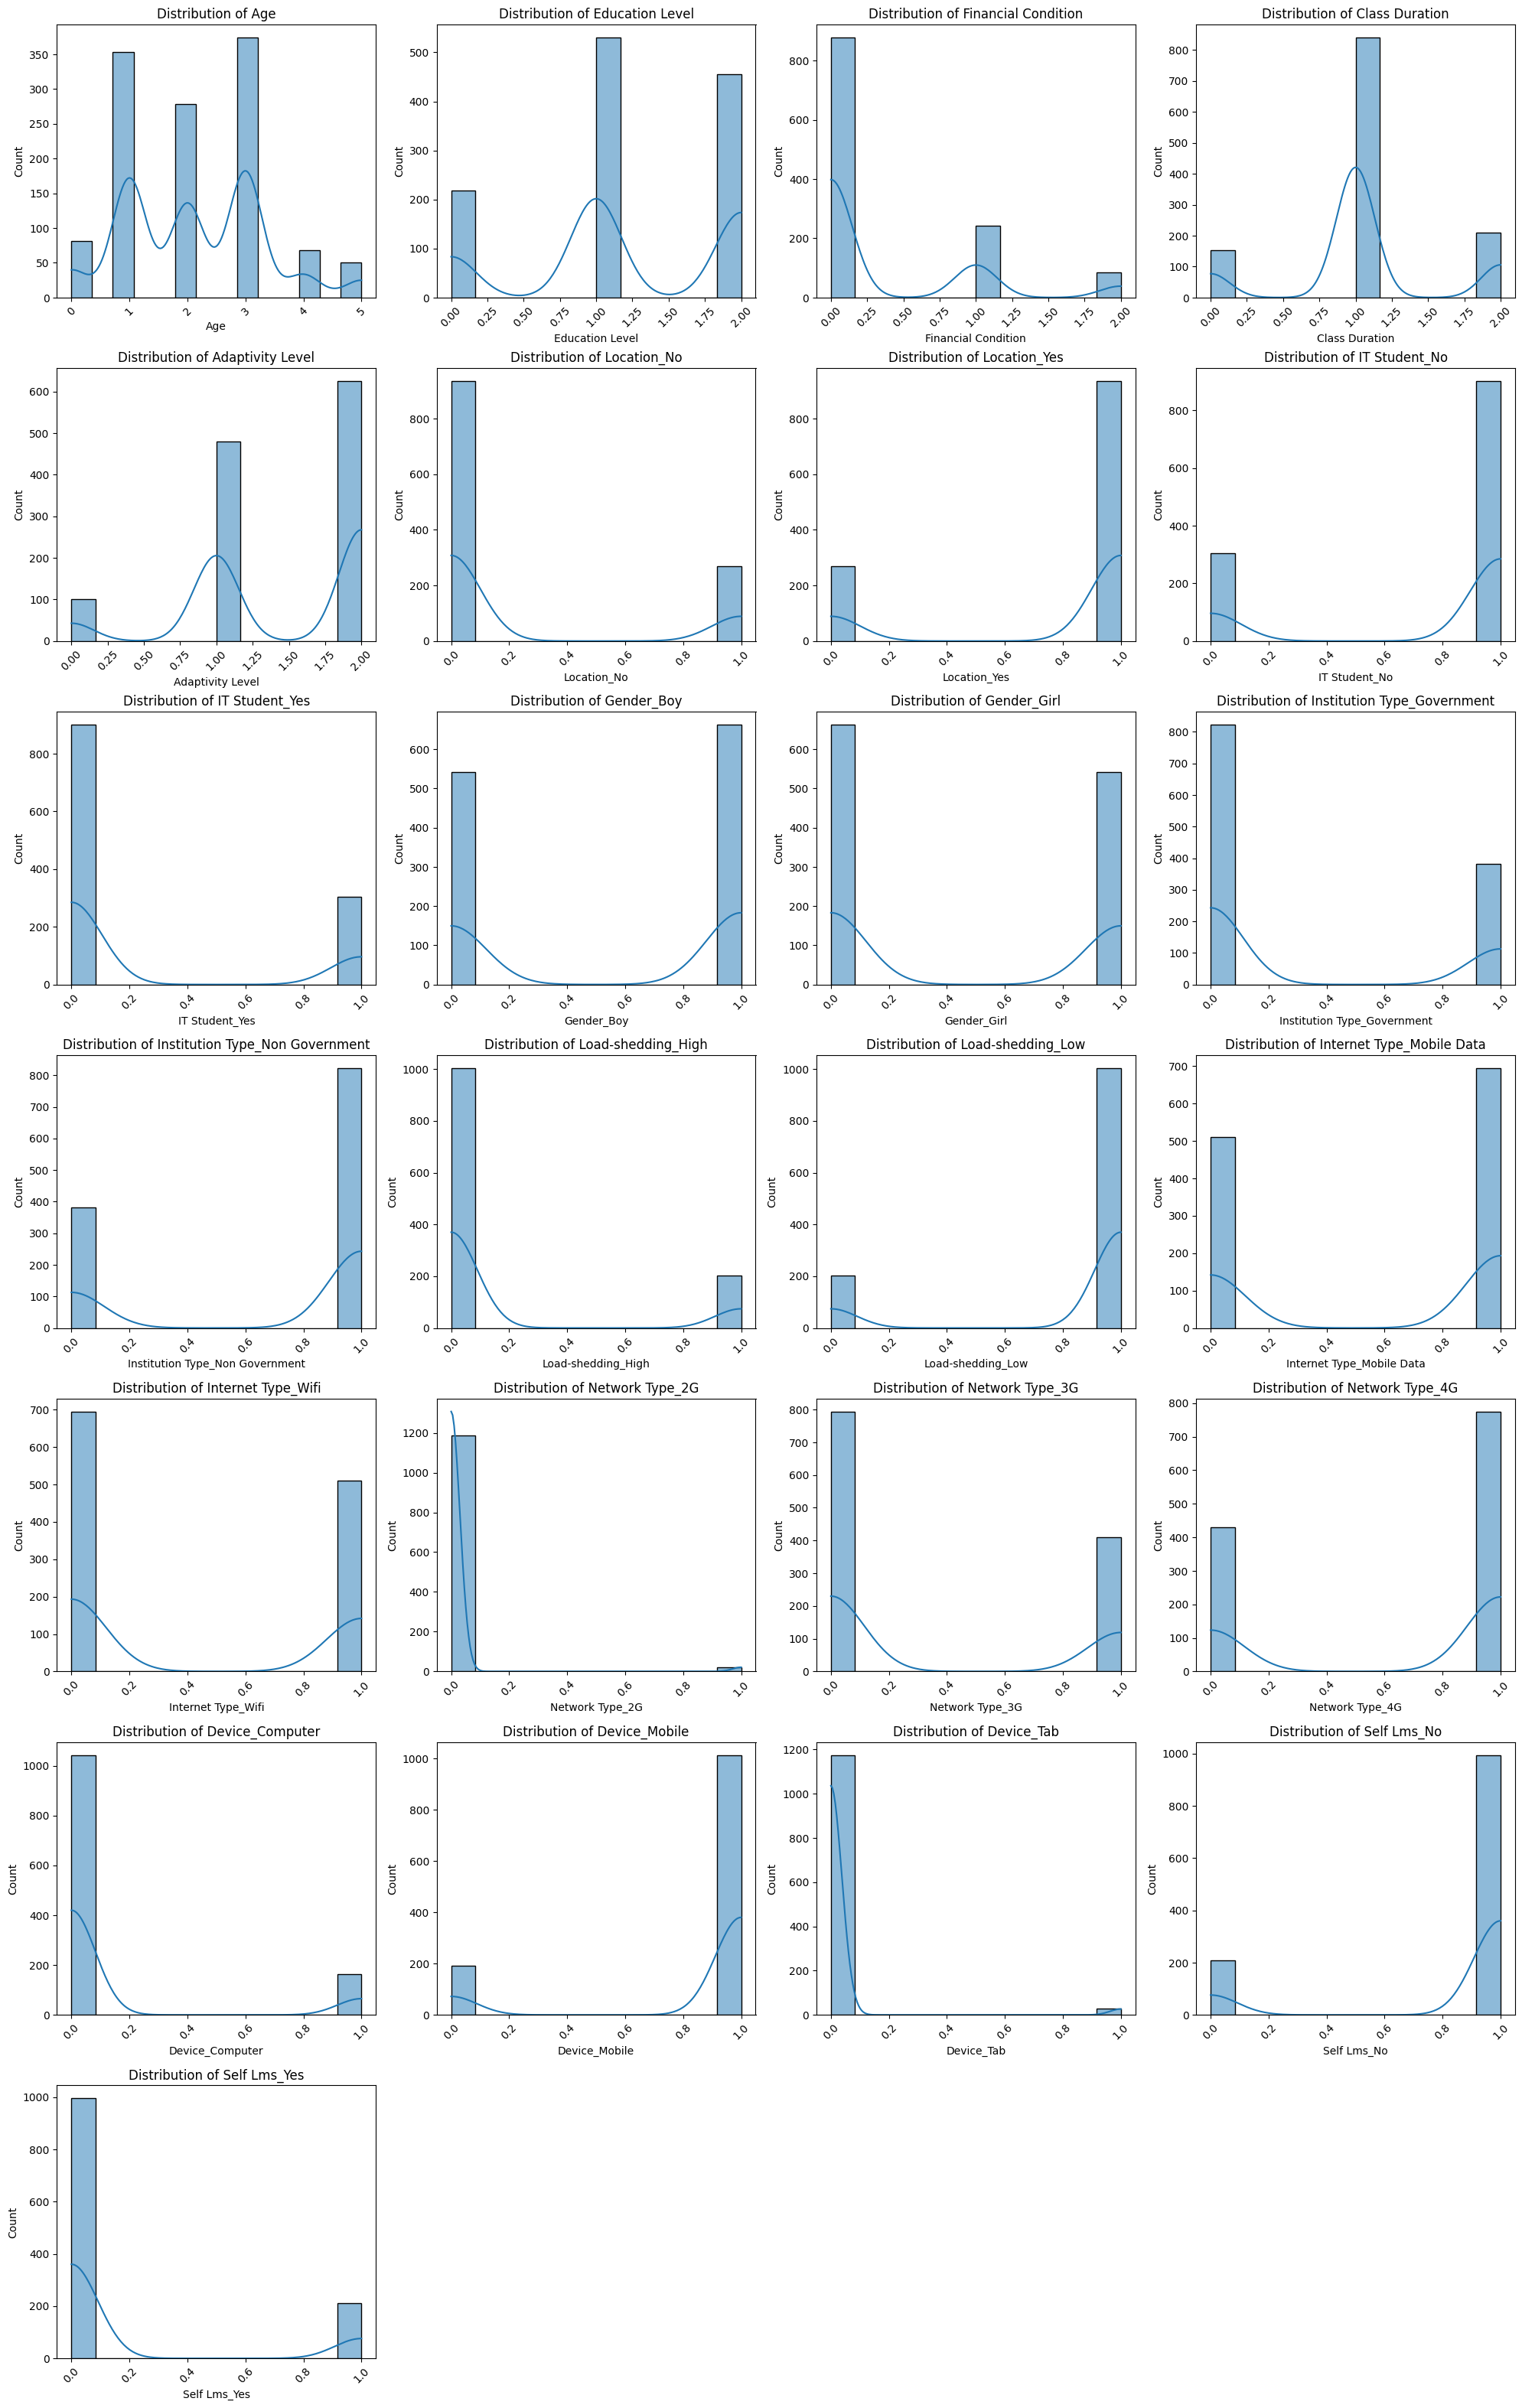

In [55]:
numerical_columns = df_encoded.select_dtypes(include=np.number).columns

plt.figure(figsize=(20, 40))

# Iterate through each channel and plot on a separate subplot
for i, column in enumerate(numerical_columns):
    plt.subplot(9, 4, i+1)
    sns.histplot(df_encoded[column], kde=True)    
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    
# Adjust layout and show the plot
plt.tight_layout()
plt.show()


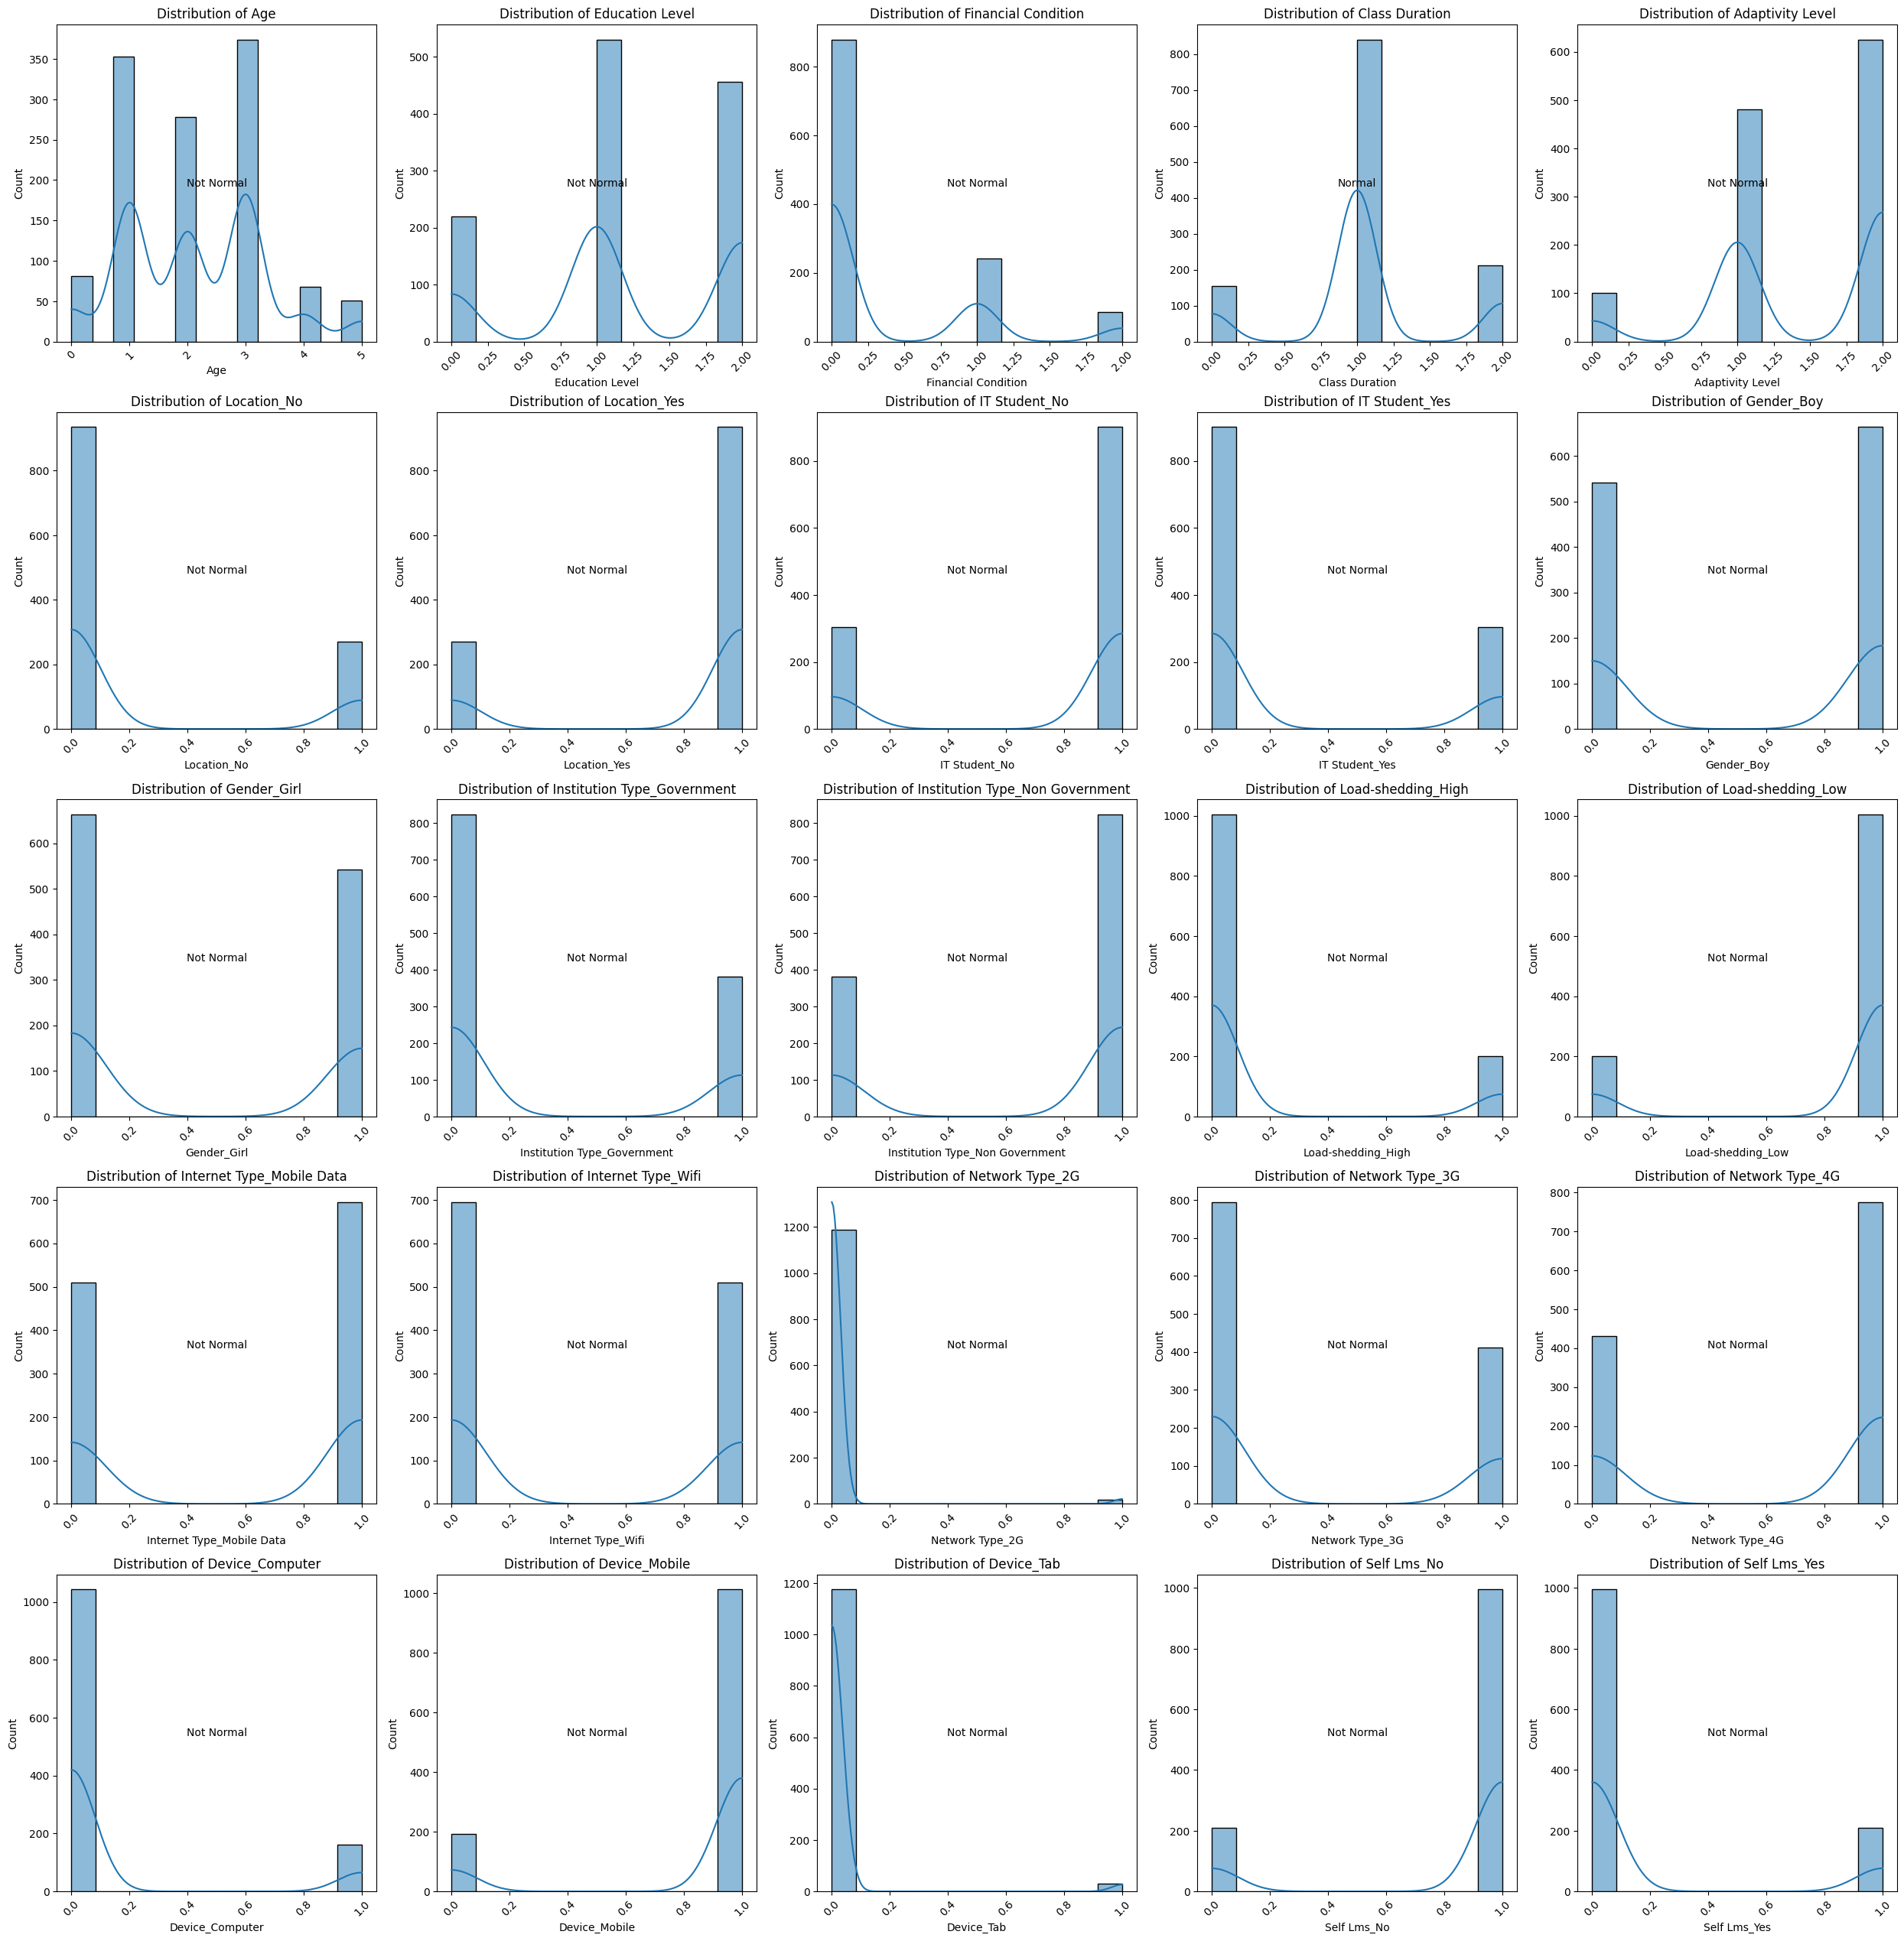

In [56]:
plt.figure(figsize=(25, 30))

# Iterate through each column and plot on a separate subplot
for i, column in enumerate(df_encoded.columns):
    plt.subplot(6, 5, i+1)
    sns.histplot(df_encoded[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    
    # Add additional analysis to detect distribution type
    # Check for normal distribution
    k2, p = stats.normaltest(df_encoded[column])
    # null hyposthesis => The sample is from Normal dsitribution
    if (p < 0.05) | (np.isnan(p)):
        plt.text(0.5, 0.5, "Not Normal", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    else:
        plt.text(0.5, 0.5, "Normal", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    
# Adjust layout and show the plot
plt.tight_layout()
plt.show()

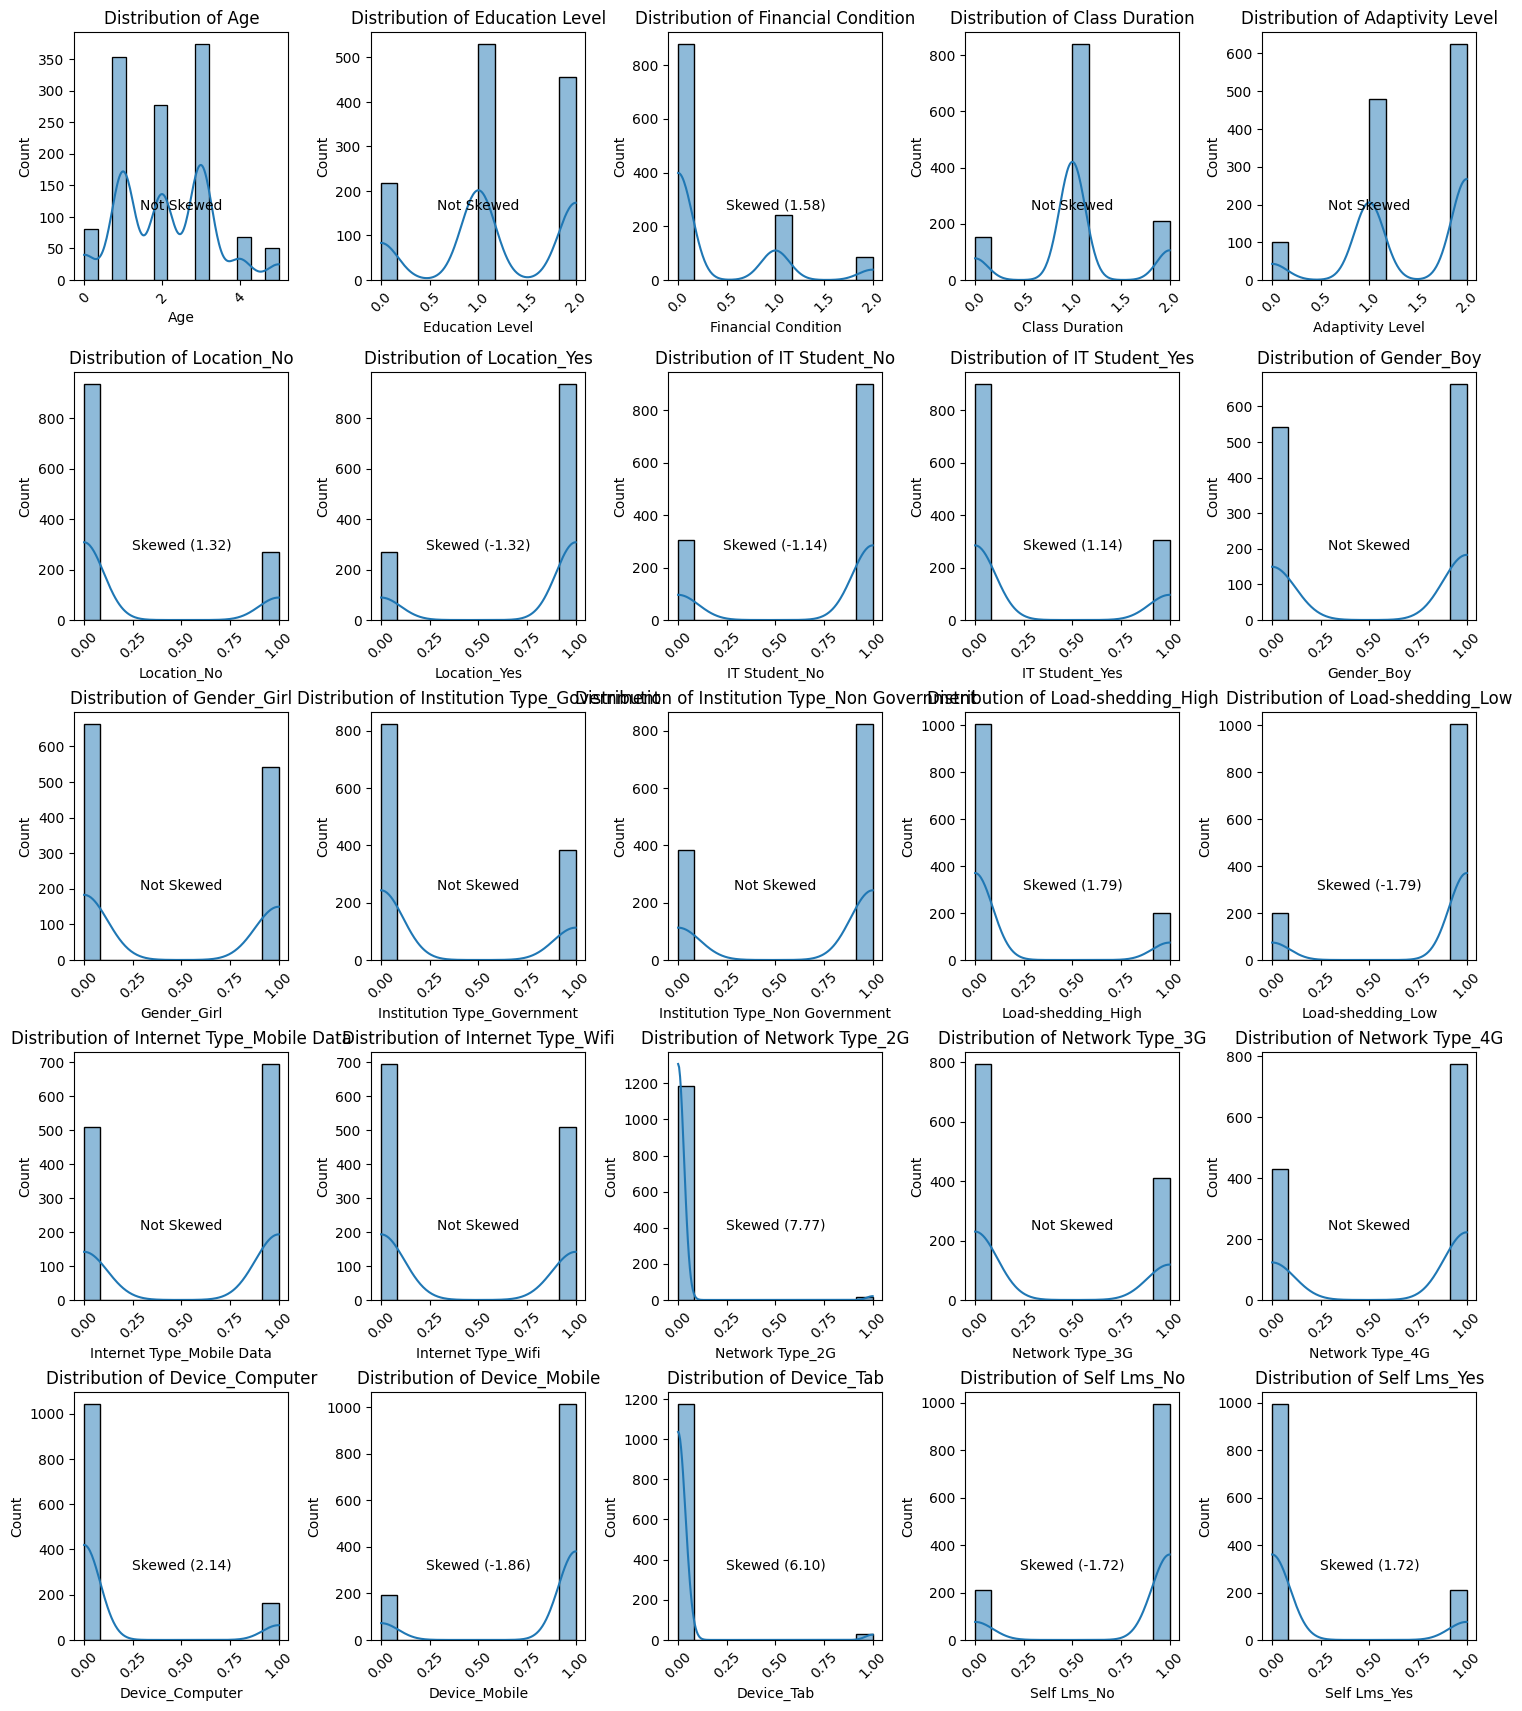

In [57]:
plt.figure(figsize=(15, 20))

# Iterate through each column and plot on a separate subplot
for i, column in enumerate(df_encoded.columns):
    plt.subplot(6, 5, i+1)
    sns.histplot(df_encoded[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    
    # Check for skewness
    skewness = stats.skew(df_encoded[column])
    if skewness < -1 or skewness > 1:
        plt.text(0.5, 0.3, f"Skewed ({skewness:.2f})", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    else:
        plt.text(0.5, 0.3, f"Not Skewed", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

### Outlier Detection

In [58]:
# Function to detect outliers using Z-score for a specific column
def detect_outliers_z_score(data, threshold=3):
    z_scores = (data - data.mean()) / data.std()
    outliers = (np.abs(z_scores) > threshold).any(axis=1)
    return outliers

In [66]:
# Detect outliers for each numeric column
outliers = detect_outliers_z_score(df_encoded[df_encoded.columns])

# Print indices of rows containing outliers
outlier_indices = df_encoded.index[outliers].tolist()
print("Index of rows with outliers:", outlier_indices)
print("Count of outliers:", len(outlier_indices))


Index of rows with outliers: [0, 75, 97, 108, 149, 189, 210, 238, 274, 277, 296, 306, 308, 316, 412, 437, 505, 511, 514, 525, 557, 582, 585, 602, 740, 754, 772, 808, 823, 846, 871, 880, 934, 935, 936, 959, 961, 978, 1012, 1020, 1041, 1046, 1056, 1079, 1123, 1145, 1158]
Count of outliers: 47


In [60]:
# df_encoded.iloc[outlier_indices]

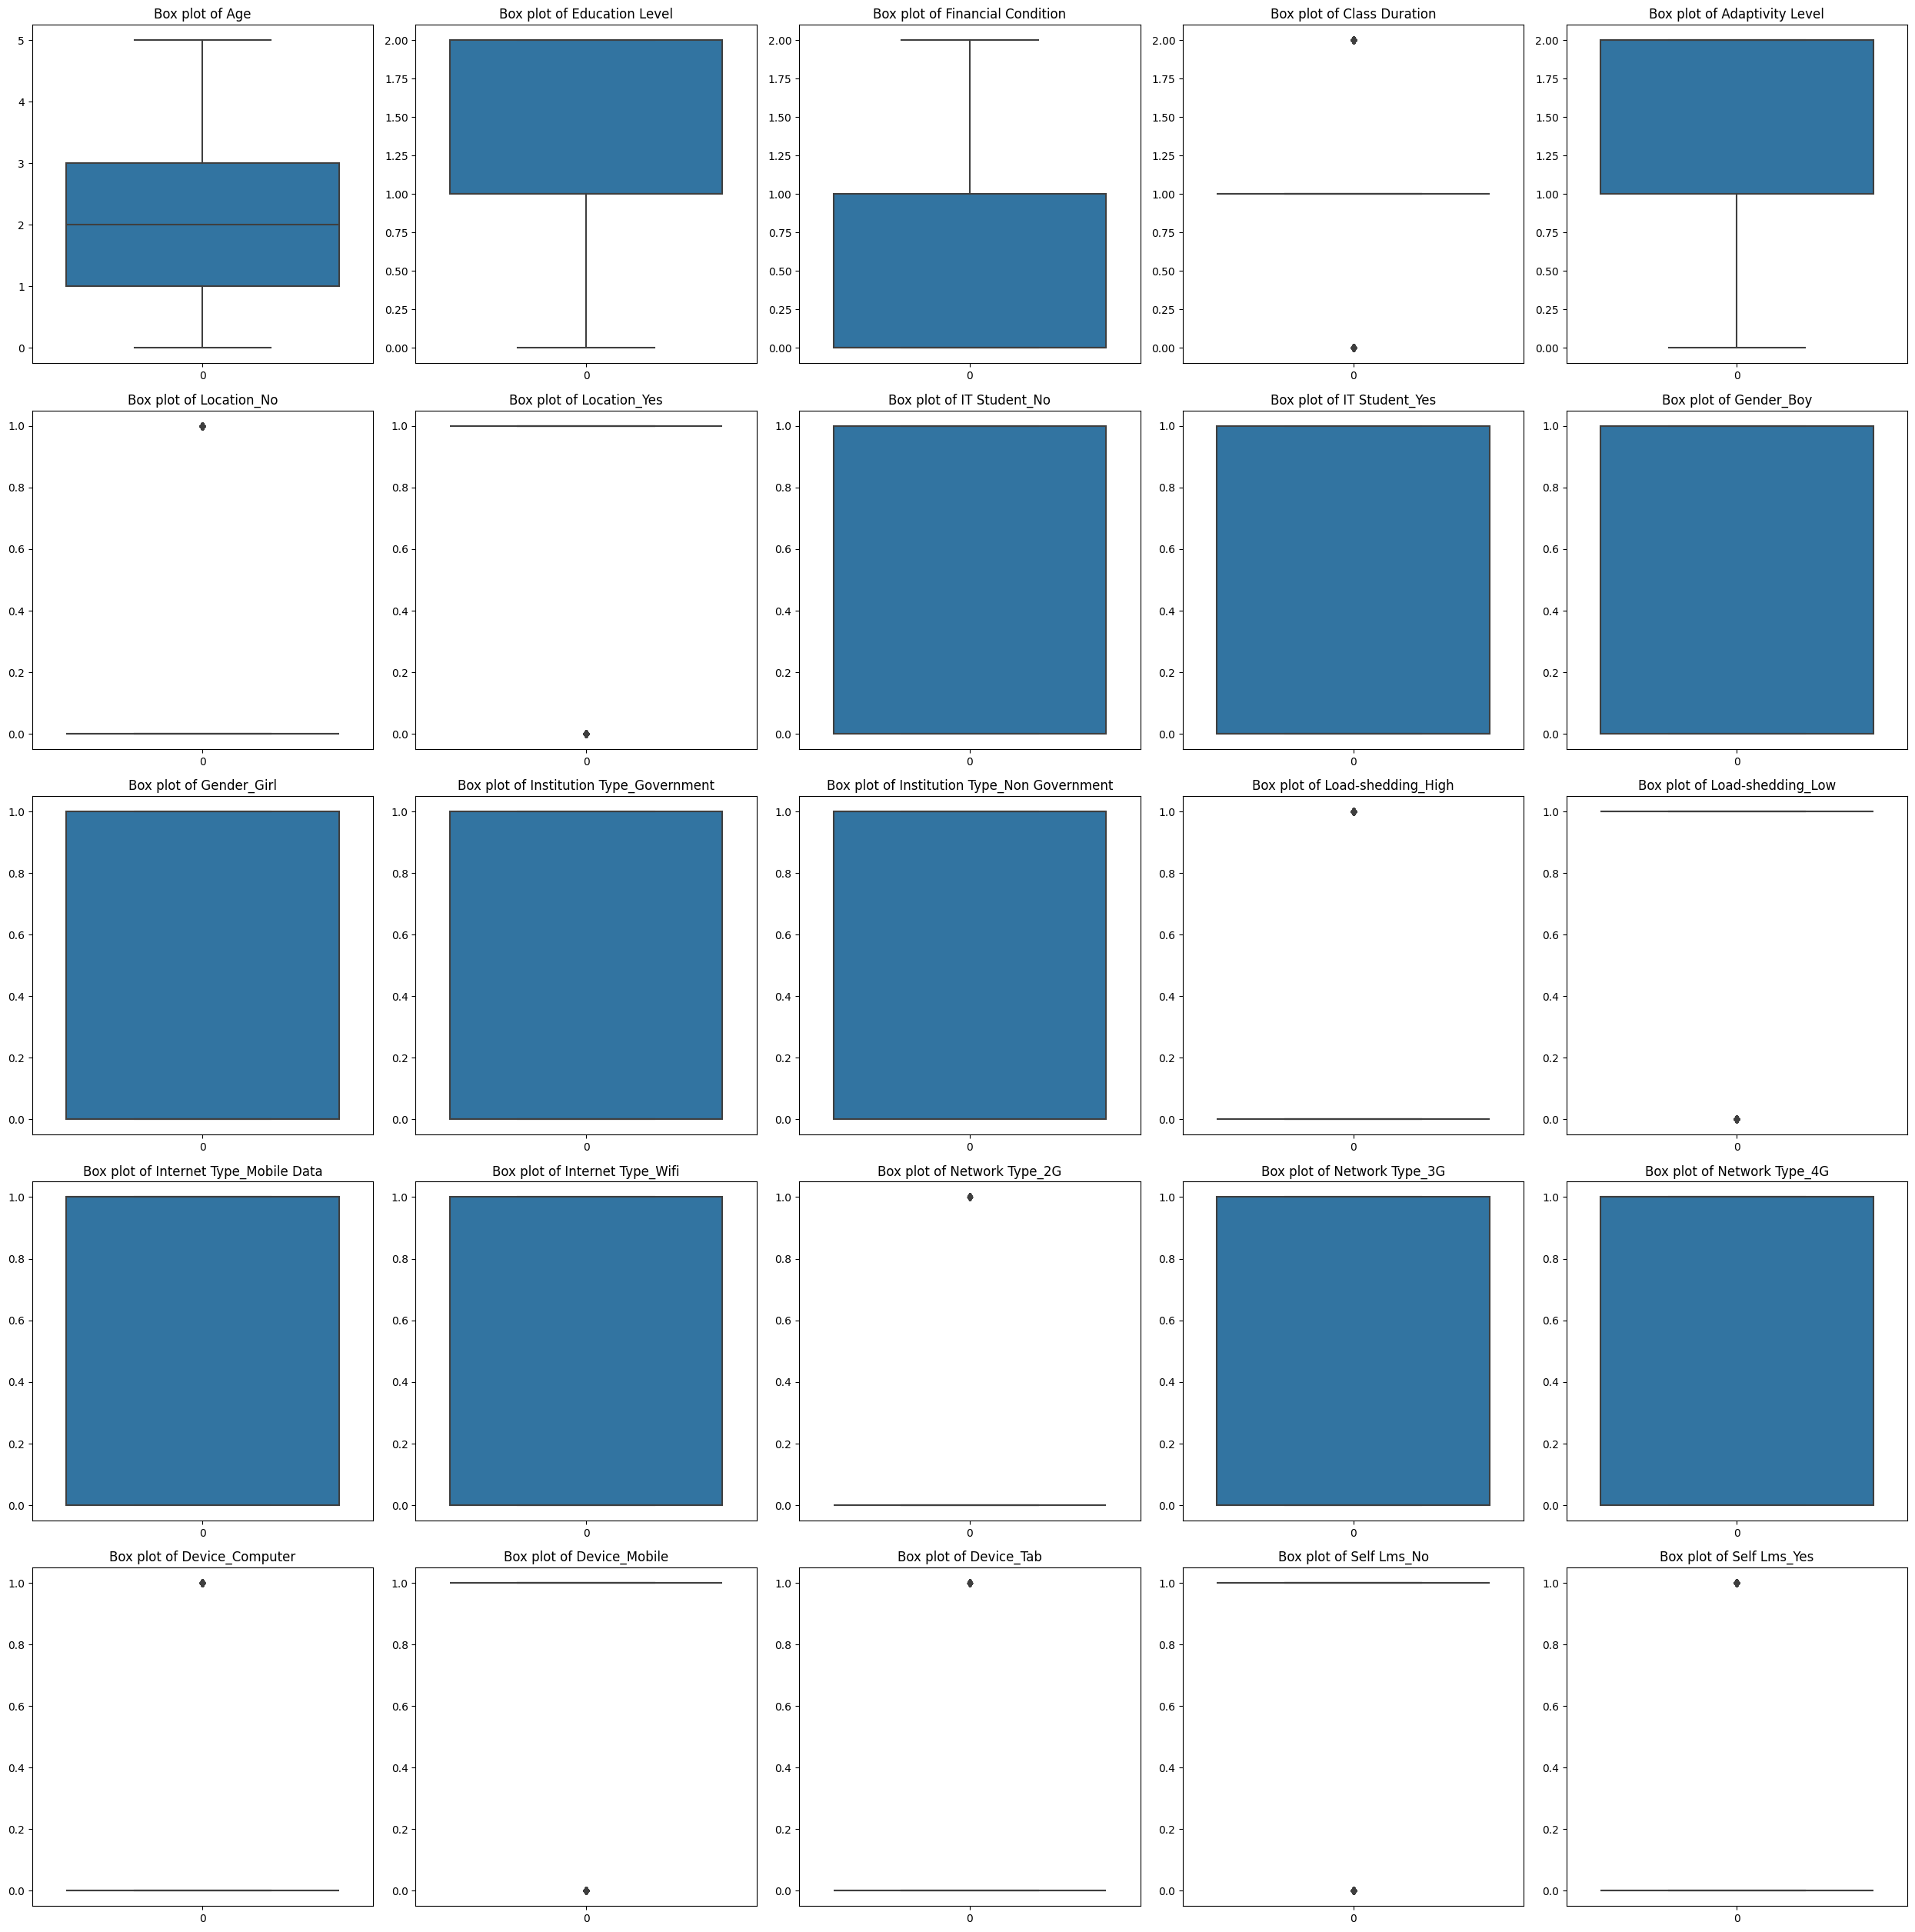

In [65]:
plt.figure(figsize=(25, 30))

# Iterate through each column and plot on a separate subplot
for i, column in enumerate(df_encoded.columns):
    plt.subplot(6, 5, i+1)
    sns.boxplot(df_encoded[column])
    plt.title(f'Box plot of {column}')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [63]:
df_final = df_encoded

In [64]:
df_final.columns.to_list()

['Age',
 'Education Level',
 'Financial Condition',
 'Class Duration',
 'Adaptivity Level',
 'Location_No',
 'Location_Yes',
 'IT Student_No',
 'IT Student_Yes',
 'Gender_Boy',
 'Gender_Girl',
 'Institution Type_Government',
 'Institution Type_Non Government',
 'Load-shedding_High',
 'Load-shedding_Low',
 'Internet Type_Mobile Data',
 'Internet Type_Wifi',
 'Network Type_2G',
 'Network Type_3G',
 'Network Type_4G',
 'Device_Computer',
 'Device_Mobile',
 'Device_Tab',
 'Self Lms_No',
 'Self Lms_Yes']

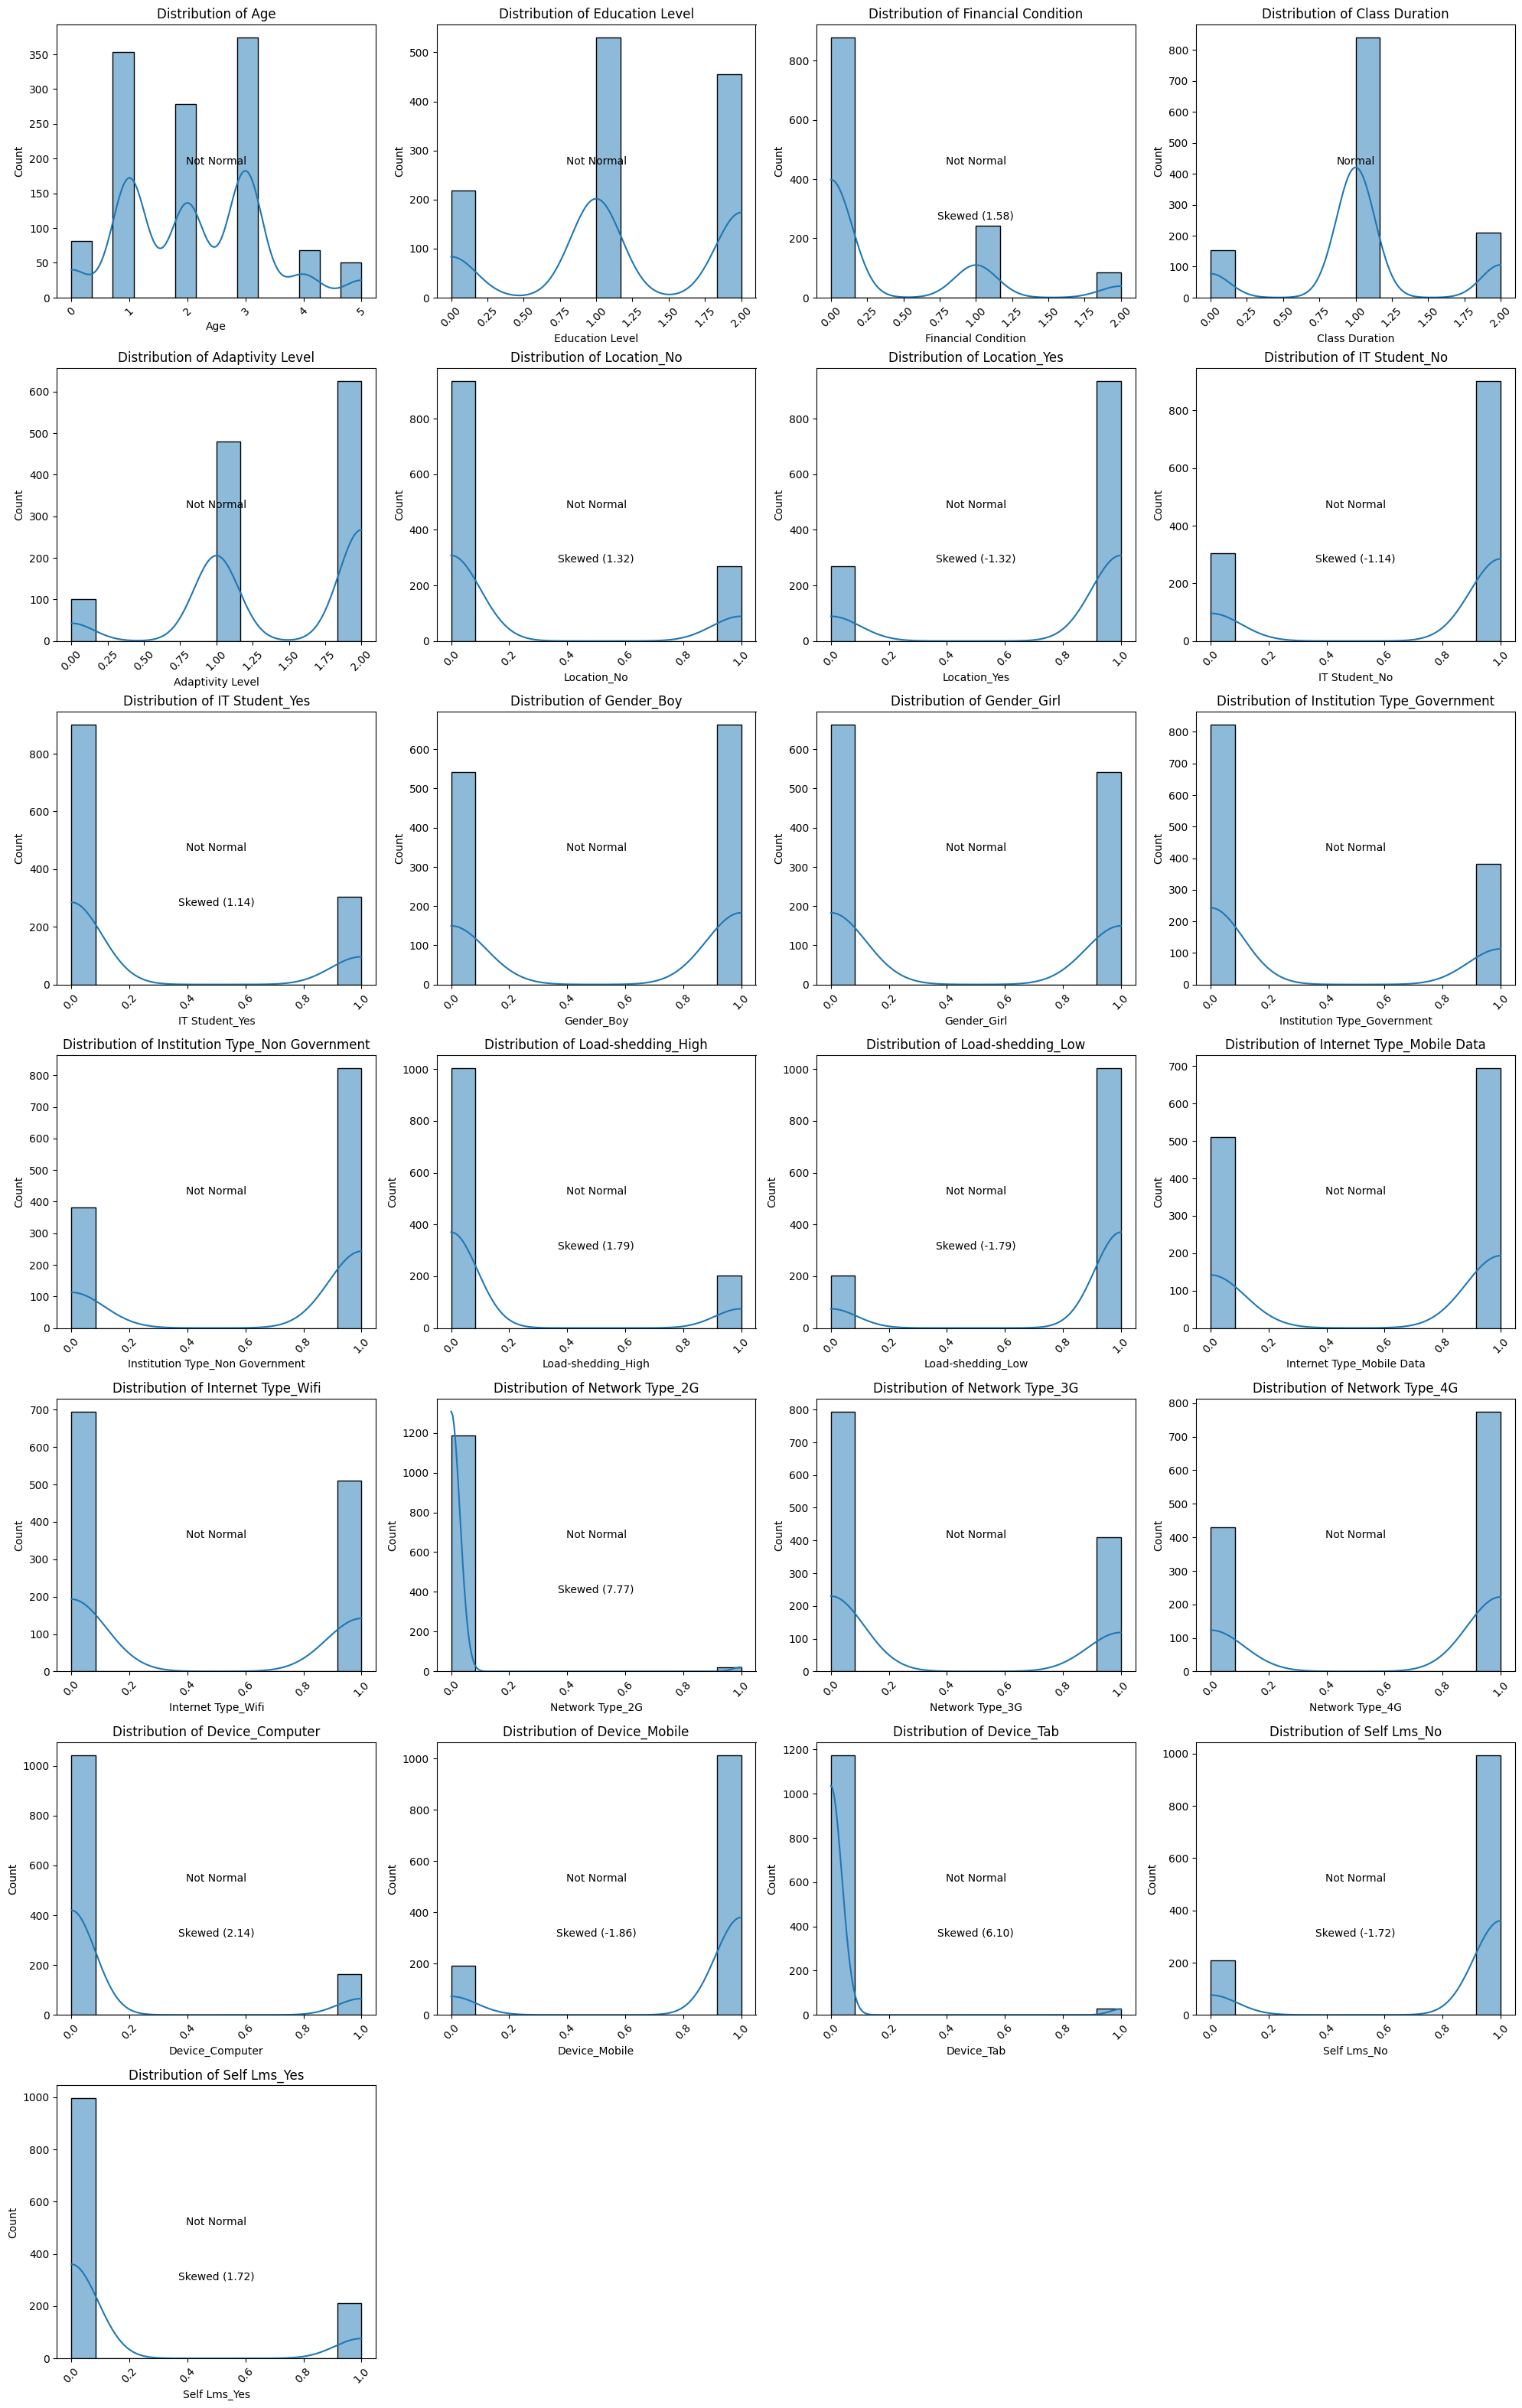

In [67]:
import seaborn as sns
from scipy import stats
numerical_columns = df_final.select_dtypes(include=np.number).columns

plt.figure(figsize=(20, 40))

# Iterate through each column and plot on a separate subplot
for i, column in enumerate(numerical_columns):
    plt.subplot(9, 4, i+1)
    sns.histplot(df_final[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    
    # Add additional analysis to detect distribution type
    # Check for normal distribution
    k2, p = stats.normaltest(df_final[column])
    if p < 0.05:
        plt.text(0.5, 0.5, "Not Normal", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    else:
        plt.text(0.5, 0.5, "Normal", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    
    # Check for uniform distribution
    min_val = df_final[column].min()
    max_val = df_final[column].max()
    if max_val - min_val < 1e-6:
        plt.text(0.5, 0.4, "Uniform", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    
    # Check for skewness
    skewness = stats.skew(df_final[column])
    if skewness < -1 or skewness > 1:
        plt.text(0.5, 0.3, f"Skewed ({skewness:.2f})", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    
# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Machine Learning Algorithms

Use KNN and Decision tree and find which one is working better.

### Define X and Y

In [68]:
# Feature matrix
X = df_final.drop('Adaptivity Level', axis=1)

# target vector
y = df_final['Adaptivity Level']

In [69]:
X

Age  Education Level  Financial Condition  Class Duration  Location_No  \
0       3                2                    0               2            0   
1       3                2                    0               1            0   
2       2                0                    0               1            0   
3       1                1                    0               1            0   
4       2                1                    1               0            0   
...   ...              ...                  ...             ...          ...   
1200    2                0                    0               1            0   
1201    2                0                    0               2            1   
1202    1                1                    0               1            0   
1203    2                0                    0               1            1   
1204    1                1                    1               1            0   

      Location_Yes  IT Student_No  IT Student_Yes  Gender_Boy  Gender_Girl  \
0                1              1               0           1            0   
1                1              1               0           0            1   
2                1              1               0           0            1   
3                1              1               0           0            1   
4                1              1               0           0            1   
...            ...            ...             ...         ...          ...   
1200             1              1               0           0            1   
1201             0              1               0           0            1   
1202             1              1               0           1            0   
1203             0              1               0           0            1   
1204             1              1               0           0            1   

      ...  Internet Type_Mobile Data  Internet Type_Wifi  Network Type_2G  \
0     ...                          0                   1                0   
1     ...                          1                   0                0   
2     ...                          0                   1                0   
3     ...                          1                   0                0   
4     ...                          1                   0                0   
...   ...                        ...                 ...              ...   
1200  ...                          0                   1                0   
1201  ...                          0                   1                0   
1202  ...                          1                   0                0   
1203  ...                          0                   1                0   
1204  ...                          1                   0                0   

      Network Type_3G  Network Type_4G  Device_Computer  Device_Mobile  \
0                   0                1                0              0   
1                   0                1                0              1   
2                   0                1                0              1   
3                   0                1                0              1   
4                   1                0                0              1   
...               ...              ...              ...            ...   
1200                0                1                0              1   
1201                0                1                0              1   
1202                1                0                0              1   
1203                0                1                0              1   
1204                1                0                0              1   

      Device_Tab  Self Lms_No  Self Lms_Yes  
0              1            1             0  
1              0            0             1  
2              0            1             0  
3              0            1             0  
4              0            1             0  
...          ...  

In [70]:
y

0       2
1       2
2       2
3       2
4       1
       ..
1200    1
1201    2
1202    2
1203    1
1204    2
Name: Adaptivity Level, Length: 1205, dtype: int32

### Feature Scaling

In [71]:
df_final["Age"].mean()

2.1228215767634855

In [72]:
df_final["Age"].max()

5

In [73]:
df_final["Age"].min()

0

In [76]:
Normalization = MinMaxScaler()
df_final["Age_normalized"] = Normalization.fit_transform(df_final[["Age"]])

In [77]:
df_final["Age_normalized"].mean()

0.4245643153526972

In [78]:
df_final["Age_normalized"].max()

1.0

In [79]:
df_final["Age_normalized"].min()

0.0

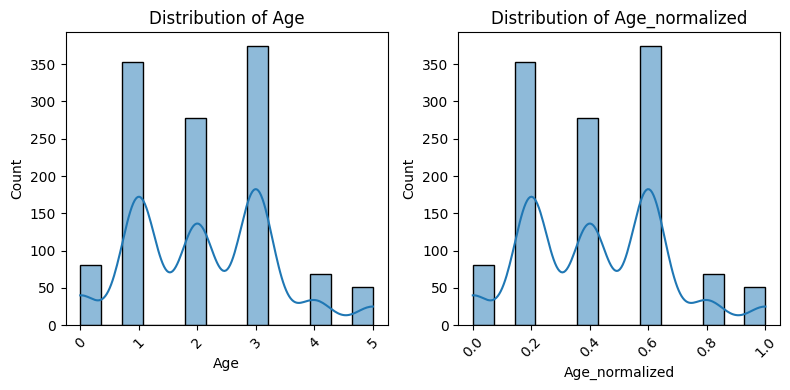

In [80]:
import seaborn as sns
from scipy import stats
numerical_columns = ["Age","Age_normalized"]

plt.figure(figsize=(8, 4))

# Iterate through each column and plot on a separate subplot
for i, column in enumerate(numerical_columns):
    plt.subplot(1, 2, i+1)
    sns.histplot(df_final[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [81]:
# drop the previous column
df_final.drop(["Age"],axis=1,inplace=True)

In [82]:
df_final.rename(columns={"Age_normalized":"Age"},inplace=True)

In [83]:
df_final.head(2)

Education Level  Financial Condition  Class Duration  Adaptivity Level  \
0                2                    0               2                 2   
1                2                    0               1                 2   

   Location_No  Location_Yes  IT Student_No  IT Student_Yes  Gender_Boy  \
0            0             1              1               0           1   
1            0             1              1               0           0   

   Gender_Girl  ...  Internet Type_Wifi  Network Type_2G  Network Type_3G  \
0            0  ...                   1                0                0   
1            1  ...                   0                0                0   

   Network Type_4G  Device_Computer  Device_Mobile  Device_Tab  Self Lms_No  \
0                1                0              0           1            1   
1                1                0              1           0            0   

   Self Lms_Yes  Age  
0             0  0.6  
1             1  0.6  

[2 rows x 25 columns]

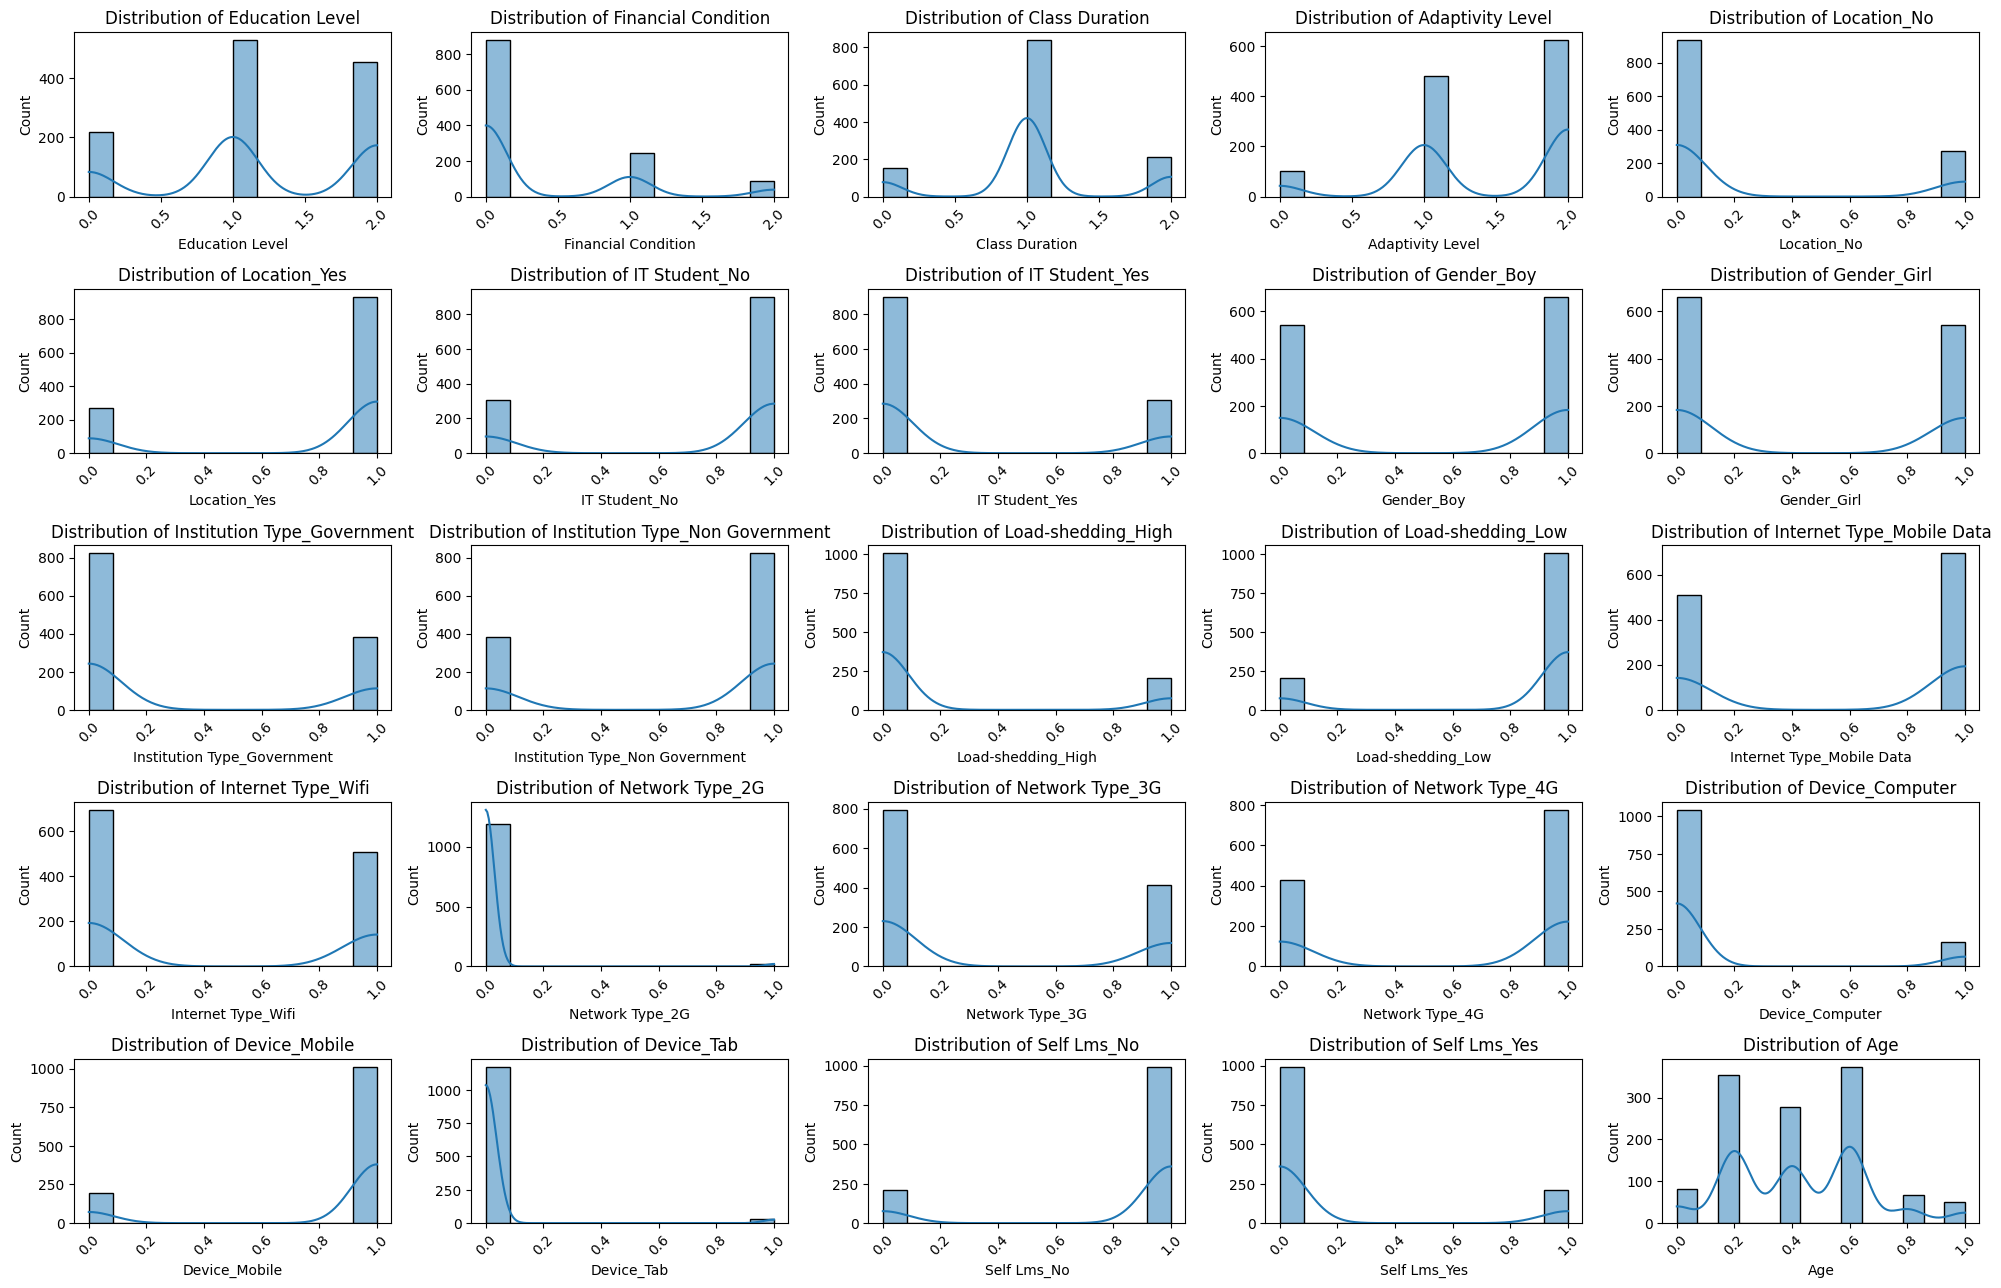

In [84]:
plt.figure(figsize=(20, 15))

# Iterate through each column and plot on a separate subplot
for i, column in enumerate(df_final.columns):
    plt.subplot(6, 5, i+1)
    sns.histplot(df_final[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [85]:
df_final.sort_index(axis=1, inplace=True)

In [86]:
df_final

Adaptivity Level  Age  Class Duration  Device_Computer  Device_Mobile  \
0                    2  0.6               2                0              0   
1                    2  0.6               1                0              1   
2                    2  0.4               1                0              1   
3                    2  0.2               1                0              1   
4                    1  0.4               0                0              1   
...                ...  ...             ...              ...            ...   
1200                 1  0.4               1                0              1   
1201                 2  0.4               2                0              1   
1202                 2  0.2               1                0              1   
1203                 1  0.4               1                0              1   
1204                 2  0.2               1                0              1   

      Device_Tab  Education Level  Financial Condition  Gender_Boy  \
0              1                2                    0           1   
1              0                2                    0           0   
2              0                0                    0           0   
3              0                1                    0           0   
4              0                1                    1           0   
...          ...              ...                  ...         ...   
1200           0                0                    0           0   
1201           0                0                    0           0   
1202           0                1                    0           1   
1203           0                0                    0           0   
1204           0                1                    1           0   

      Gender_Girl  ...  Internet Type_Wifi  Load-shedding_High  \
0               0  ...                   1                   0   
1               1  ...                   0                   1   
2               1  ...                   1                   0   
3               1  ...                   0                   0   
4               1  ...                   0                   0   
...           ...  ...                 ...                 ...   
1200            1  ...                   1                   0   
1201            1  ...                   1                   1   
1202            0  ...                   0                   0   
1203            1  ...                   1                   0   
1204            1  ...                   0                   0   

      Load-shedding_Low  Location_No  Location_Yes  Network Type_2G  \
0                     1            0             1                0   
1                     0            0             1                0   
2                     1            0             1                0   
3                     1            0             1                0   
4                     1            0             1                0   
...                 ...          ...           ...              ...   
1200                  1            0             1                0   
1201                  0            1             0                0   
1202                  1            0             1                0   
1203                  1            1             0                0   
1204                  1            0             1                0   

      Network Type_3G  Network Type_4G  Self Lms_No  Self Lms_Yes  
0                   0                1            1             0  
1                   0                1            0             1  
2                   0                1            1             0  
3                   0                1            1             0  
4                   1                0            1             0  
...               ...              ...          ...           ...  
1200                0                1            1             0  
1201                0     

In [87]:
df_final["Age"].mean()

0.4245643153526972

In [88]:
df_final["Age"].max()

1.0

In [89]:
df_final["Age"].min()

0.0

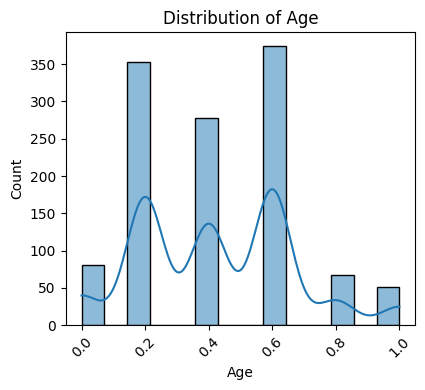

In [90]:
numerical_columns = ["Age"]

plt.figure(figsize=(8, 4))

# Iterate through each column and plot on a separate subplot
for i, column in enumerate(numerical_columns):
    plt.subplot(1, 2, i+1)
    sns.histplot(df_final[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

### Spliting data into Feature Matrix and Target Vector

In [91]:
# Feature matrix
X = df_final.drop('Adaptivity Level', axis=1)

# target vector
y = df_final['Adaptivity Level']

### Train Test Split

In [92]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
# (X_train) , (y_train)

# 1. KNN

In [94]:
from sklearn.neighbors import KNeighborsClassifier

In [95]:
knn = KNeighborsClassifier(n_neighbors=1)

In [96]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [97]:
pred = knn.predict(X_test)

In [100]:
# pred

In [101]:
from sklearn.metrics import classification_report,confusion_matrix

In [102]:
print(confusion_matrix(y_test,pred))

[[ 14   4   5]
 [  0  97   6]
 [  1  12 102]]


In [103]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.61      0.74        23
           1       0.86      0.94      0.90       103
           2       0.90      0.89      0.89       115

    accuracy                           0.88       241
   macro avg       0.90      0.81      0.84       241
weighted avg       0.89      0.88      0.88       241



In [104]:
#Training Accuracy
print(knn.score(X_train, y_train))

0.91701244813278


In [105]:
#Testing Accuracy
print(knn.score(X_test, y_test))

0.8838174273858921


### Check different distance metric

       - Euclidean
       - Manhattan 
       - Chebyshev 
       - Minkowski

In [106]:
# Importing the required libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# List of distance metrics to try
distance_metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']

# Loop through each distance metric and train the KNN classifier
for metric in distance_metrics:
    # Initialize the KNN classifier with the current metric
    knn = KNeighborsClassifier(n_neighbors=1, metric=metric)
    
    # Train the classifier
    knn.fit(X_train, y_train)
    
    # Make predictions
    pred = knn.predict(X_test)
    
    # Print confusion matrix and classification report
    print(f"Distance Metric: {metric}")
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    print("Training Accuracy:", knn.score(X_train, y_train))
    print("Testing Accuracy:", knn.score(X_test, y_test))
    print()


Distance Metric: euclidean
[[ 14   4   5]
 [  0  97   6]
 [  1  12 102]]
              precision    recall  f1-score   support

           0       0.93      0.61      0.74        23
           1       0.86      0.94      0.90       103
           2       0.90      0.89      0.89       115

    accuracy                           0.88       241
   macro avg       0.90      0.81      0.84       241
weighted avg       0.89      0.88      0.88       241

Training Accuracy: 0.91701244813278
Testing Accuracy: 0.8838174273858921

Distance Metric: manhattan
[[ 14   4   5]
 [  0  97   6]
 [  1  12 102]]
              precision    recall  f1-score   support

           0       0.93      0.61      0.74        23
           1       0.86      0.94      0.90       103
           2       0.90      0.89      0.89       115

    accuracy                           0.88       241
   macro avg       0.90      0.81      0.84       241
weighted avg       0.89      0.88      0.88       241

Training Accuracy:

Minimum error: 0.11618257261410789 at K = 0


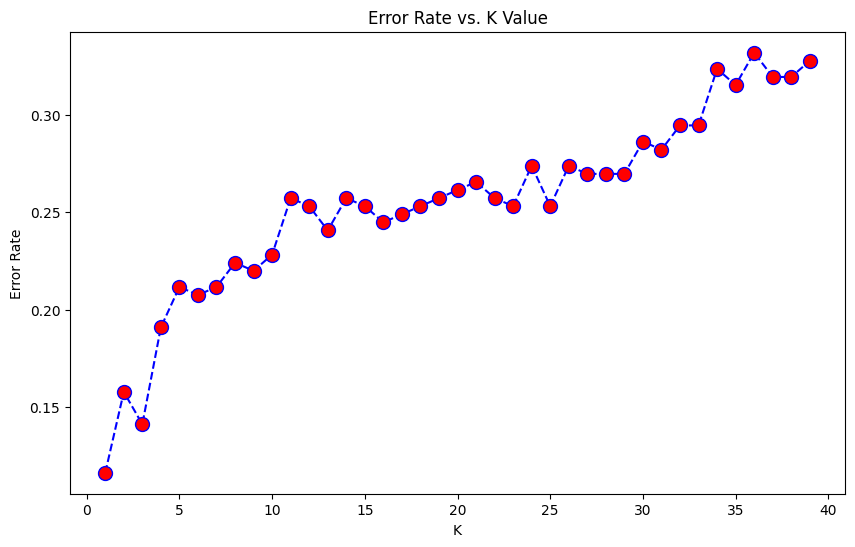

In [107]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy: 0.8838174273858921 at K = 0


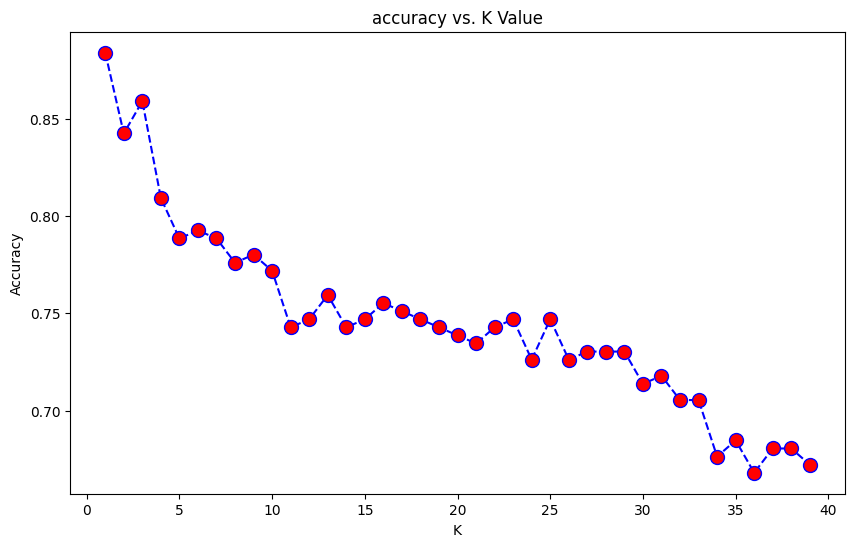

In [108]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:",max(acc),"at K =",acc.index(max(acc)))

In [109]:
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.71      0.65      0.68        23
           1       0.80      0.94      0.86       103
           2       0.93      0.79      0.85       115

    accuracy                           0.84       241
   macro avg       0.81      0.80      0.80       241
weighted avg       0.85      0.84      0.84       241



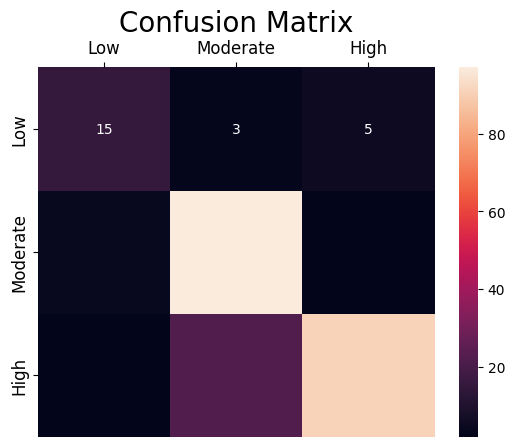

In [110]:

# Assuming y_test and y_pred_gini are your true labels and predicted labels respectively

# Create a subplot
ax = plt.subplot()

# Create a heatmap of the confusion matrix
sns.heatmap(confusion_matrix(y_test, pred), annot=True, ax=ax, fmt='g')

# Set the title of the plot
ax.set_title('Confusion Matrix', fontsize=20)

# Set tick labels for x-axis (predicted labels)
ax.xaxis.set_ticklabels(['Low', 'Moderate', 'High'], fontsize=12)
ax.xaxis.tick_top()

# Set tick labels for y-axis (true labels)
ax.yaxis.set_ticklabels(['Low', 'Moderate', 'High'], fontsize=12)

# Show the plot
plt.show()


# 2. Decision Tree


In [111]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [112]:
# Initializing and training the Decision Tree Classifier with Gini impurity
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

**Use Gini Index**

In [113]:
# Making predictions and evaluating the models
y_pred_gini = dt_gini.predict(X_test)

accuracy_gini = accuracy_score(y_test, y_pred_gini)

accuracy_gini

0.8921161825726142

In [114]:
# Calculate accuracy and generate classification report
accuracy_gini = accuracy_score(y_test, y_pred_gini)
dt_gini_classification_rep = classification_report(y_test, y_pred_gini)

In [115]:
print(dt_gini_classification_rep)

              precision    recall  f1-score   support

           0       0.83      0.65      0.73        23
           1       0.93      0.90      0.92       103
           2       0.87      0.93      0.90       115

    accuracy                           0.89       241
   macro avg       0.88      0.83      0.85       241
weighted avg       0.89      0.89      0.89       241




**Using Entropy**

In [116]:
# Initializing and training the Decision Tree Classifier with Information Gain (Entropy)
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [117]:
# Making predictions and evaluating the models
y_pred_entropy = dt_entropy.predict(X_test)

accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

accuracy_entropy

0.8838174273858921

In [118]:
# generate classification report
dt_entropy_classification_rep = classification_report(y_test, y_pred_entropy)
print(dt_entropy_classification_rep)

              precision    recall  f1-score   support

           0       0.88      0.65      0.75        23
           1       0.92      0.88      0.90       103
           2       0.86      0.93      0.89       115

    accuracy                           0.88       241
   macro avg       0.89      0.82      0.85       241
weighted avg       0.89      0.88      0.88       241



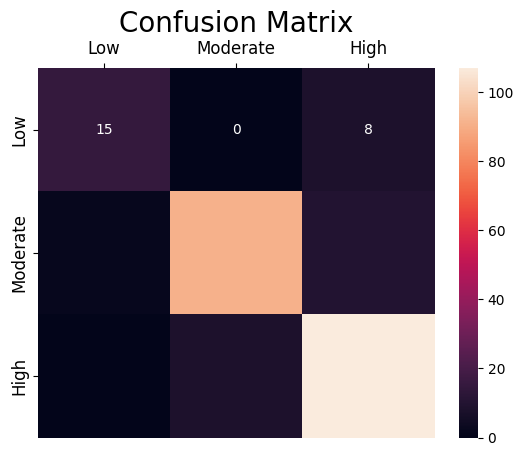

In [119]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred_entropy), annot=True, ax = ax, fmt = 'g'); 
ax.set_title('Confusion Matrix', fontsize=20)

ax.xaxis.set_ticklabels(['Low', 'Moderate','High'], fontsize = 12)
ax.xaxis.tick_top()

ax.yaxis.set_ticklabels(['Low', 'Moderate','High'], fontsize = 12)
plt.show()

In [120]:
# Assuming you have the confusion matrix, classification report, and ROC AUC scores
# for both Gini and Entropy models

# Accuracy Comparison
accuracy_gini = accuracy_score(y_test, y_pred_gini)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
confusion_entropy = confusion_matrix(y_test, y_pred_entropy)
confusion_gini = confusion_matrix(y_test, y_pred_gini)

print("Accuracy Comparison:")
print("Gini Model Accuracy: {:.2f}".format(accuracy_gini))
print("Entropy Model Accuracy: {:.2f}".format(accuracy_entropy))

# Confusion Matrix Comparison
print("\nConfusion Matrix Comparison:")
print("Gini Model Confusion Matrix:\n", confusion_gini)
print("\nEntropy Model Confusion Matrix:\n", confusion_entropy)

# Classification Report Comparison
print("\nClassification Report Comparison:")
print("Gini Model Classification Report:\n", dt_gini_classification_rep)
print("\nEntropy Model Classification Report:\n", dt_entropy_classification_rep)

Accuracy Comparison:
Gini Model Accuracy: 0.89
Entropy Model Accuracy: 0.88

Confusion Matrix Comparison:
Gini Model Confusion Matrix:
 [[ 15   0   8]
 [  2  93   8]
 [  1   7 107]]

Entropy Model Confusion Matrix:
 [[ 15   0   8]
 [  2  91  10]
 [  0   8 107]]

Classification Report Comparison:
Gini Model Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.65      0.73        23
           1       0.93      0.90      0.92       103
           2       0.87      0.93      0.90       115

    accuracy                           0.89       241
   macro avg       0.88      0.83      0.85       241
weighted avg       0.89      0.89      0.89       241


Entropy Model Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.65      0.75        23
           1       0.92      0.88      0.90       103
           2       0.86      0.93      0.89       115

    accuracy                  

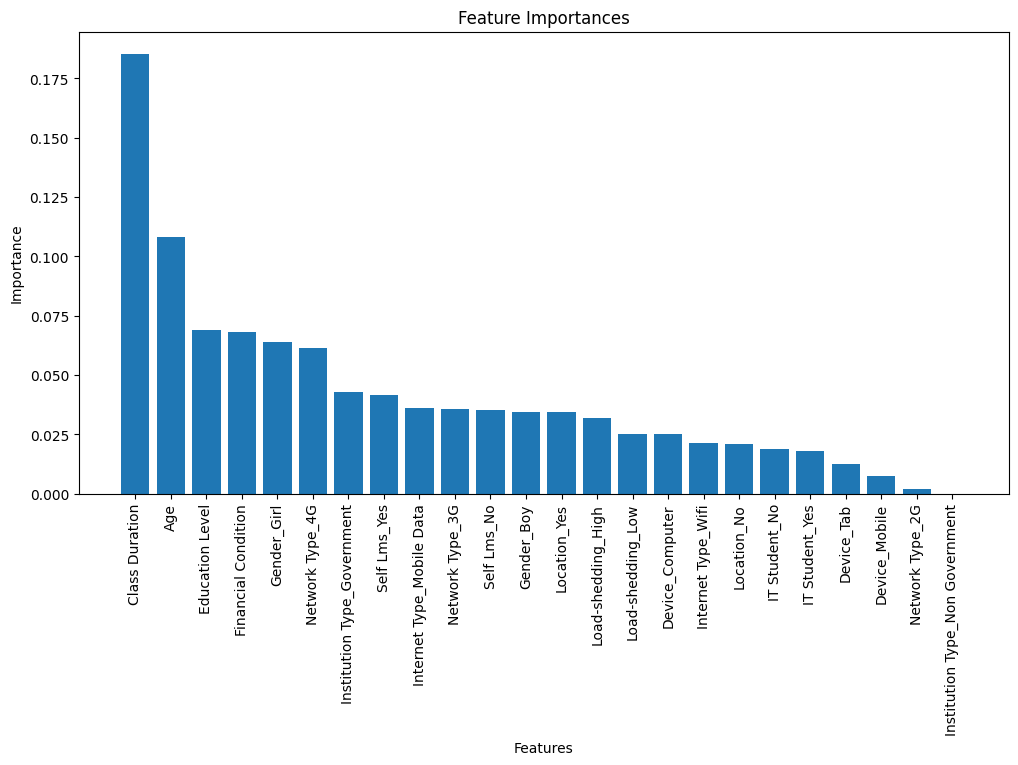

In [121]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a dataset 'df_encoded' and target variable 'y'

# Train a Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X, y)

# Get Feature Importances
importances = dt_model.feature_importances_

# Convert to a DataFrame
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Visualize Feature Importances
plt.figure(figsize=(12, 6))
plt.bar(feature_importances['feature'], feature_importances['importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.title('Feature Importances')
plt.show()


# Thank You
